In [1]:
%config IPCompleter.greedy = True
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

pd.set_option('mode.chained_assignment', None)
sn.set(rc={'figure.figsize':(9,9)})
sn.set(font_scale=1.4)

# Decomposing signals in components (Maxtrix factorization)

To reduce the dimensionality and still keep statstical signals and patterns from our dataset matrix $X$, which is 
$[n_{samples}, n_{dimensions}]$.

We often can use *matrix factorixation* methods to decompose $X$ into various forms, each of which has various mathematical properties.

One of the most common factorizations that applies well here, is Singular value decomposition (SVD) which generalizes the eigendecomposition of a square normal matrix to any $m\times n$ matrix via an extension of the polar decomposition.

$$ X = M = U\Sigma V^* $$

Where $U$ is an $m \times m$ real unitary matrix, $\Sigma$ is an $m \times n$ rectangular diagonal matrix with non-negative real numbers on the diagonal, and $V$ is an $n \times n$ real unitary matrix. $U$ and $V=V^*$ are real orthonormal matrices.

The diagonal entries $\sigma_i=\Sigma_{i i}$ of $\Sigma$ are known as the *singular value's* of $X$. The number of non-zero singular values is equal to the rank of $X$. The columns of $U$ and the columns of $V$ are called the *left-singular vectors* and *right-singular vectors* of $X$, respectively. The SVD is not unique. It is always possible to choose the decomposition so that the singular values $\Sigma_{i i}$are in descending order.

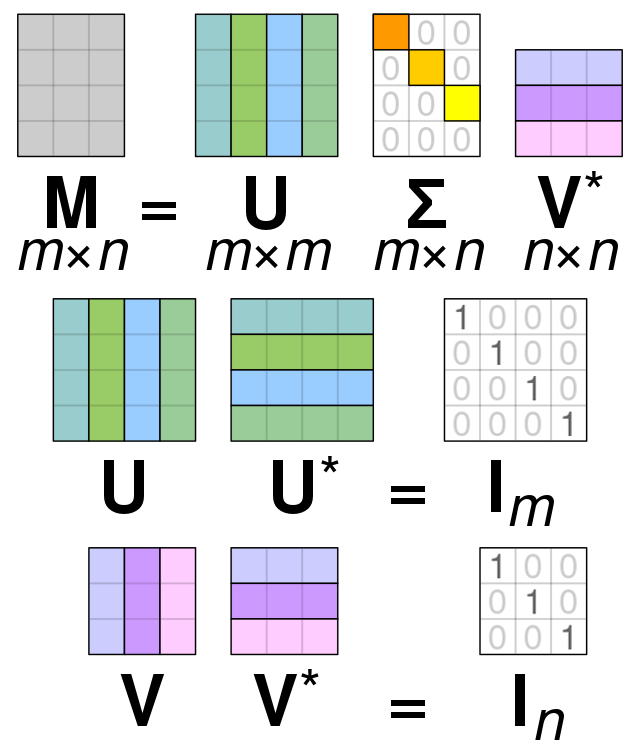
[[1](https://en.wikipedia.org/wiki/File:Singular_value_decomposition_visualisation.svg)]

We can use this form to reduce the dimensionality of $X$, by setting the $s$ smallest *singular value's* to $0$, thus we can eliminate the corresponding $s$ columns of $U$ and $V$. This would then form a new $X'$ that has the dimensions of $[n_{samples}, n_{dimensions - s}]$. This is what the model `TruncatedSVD` tries to do.


## Truncated SVD (Singular Value Decomposition)

`TruncatedSVD` implements a variant of singular value decomposition (SVD) that only computes the $k$ largest singular values, where $k$ is a user-specified parameter.

`TruncatedSVD` applied to the training samples $X$ produces a low-rank approximation $X_k$ :

$$ X \approx X_k = U_k \Sigma_k V_k^\top $$

After this operation, $ U_k \Sigma_k^\top $ is the transformed training set with $k$ features (called `n_components`)

To transform a test set $X$ so that the data is rotated so that it is aligned with the orthogonal *right-singular vectors*:

$$ X' = X V_k $$

X shape : (500, 5)
V^T Components : [[-0.14063368 -0.04106125  0.11459769 -0.97984378 -0.07286753]
 [-0.52719647  0.48555467 -0.69639822 -0.02787688  0.02351466]]
Explained variance ratio : [0.22369166 0.21403821]
Singular values : [23.08391911 22.57839233]
X' shape : (500, 2)


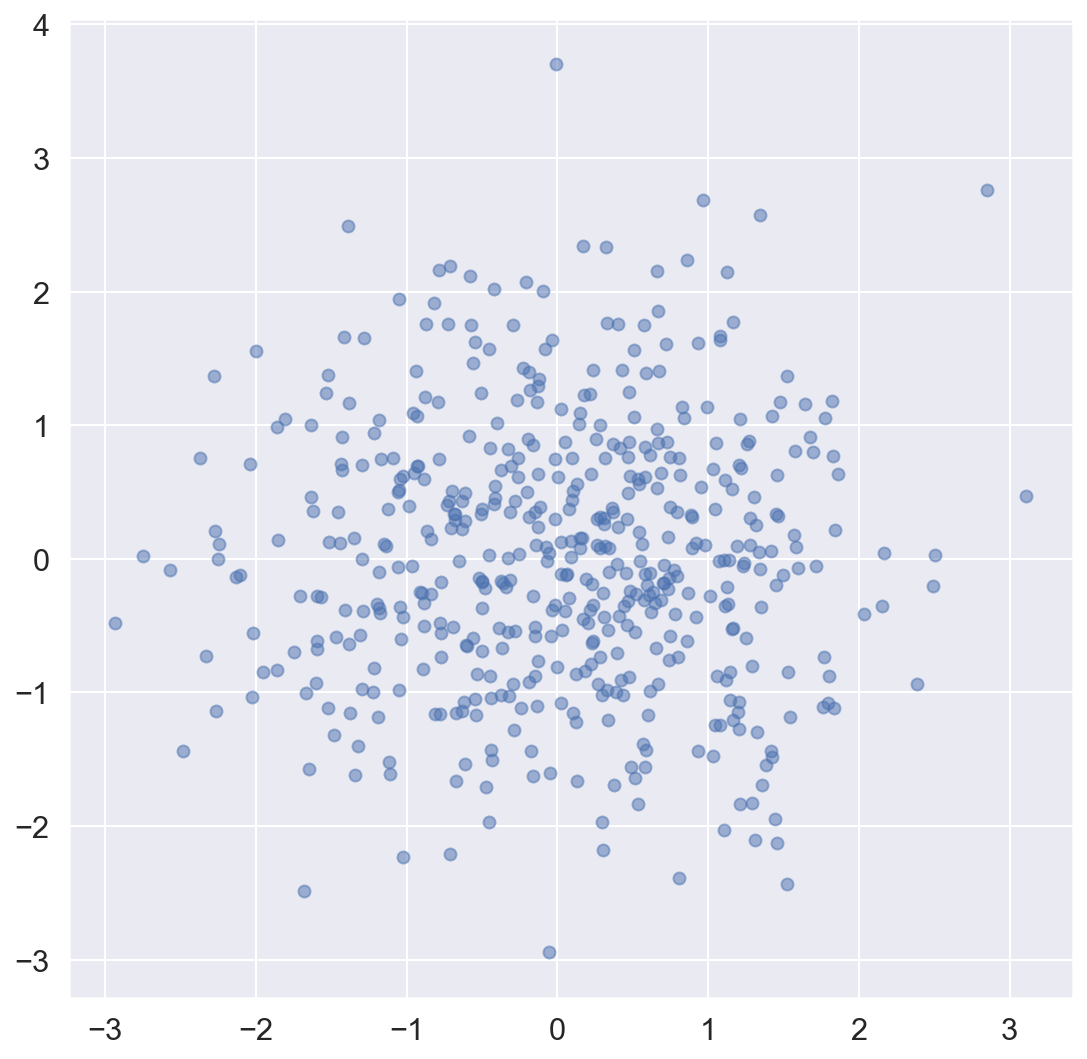

In [2]:
from sklearn.decomposition import TruncatedSVD

np.random.seed(0)
n_samples = 500
X = np.random.randn(n_samples, 5)

svd = TruncatedSVD(n_components=2)
svd.fit(X)

X_reduced = svd.transform(X)
print('X shape : {}'.format(X.shape))
print('V^T Components : {}'.format(svd.components_))
print('Explained variance ratio : {}'.format(svd.explained_variance_ratio_))
print('Singular values : {}'.format(svd.singular_values_))
print("X' shape : {}".format(X_reduced.shape))

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5)
plt.show()


## Principal Component Analysis

Principal component analysis (PCA) uses this orthogonal transformation to convert a set of observations of possibly correlated variables $X$ into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a linear combination of the variables and containing $n$ observations) are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

This centers each sample in $X$ to have a mean of $0$, then applies the SVD decomposition. This results in a very useful property that the variance of the data in any low-dimensional representation is maximized. The eigenvectors or *right-singular vectors* that correspond to the largest eigenvalues or *singular value's* (the principal components) can now be used to reconstruct a large fraction of the variance of the original data.

We use this `sklearn` to reduce the dimension of the $X$ in such a way that the variance of the data in the low-dimensional representation is maximized. Which can be useful for plotting, via reducing the $X$ to $2d$ or $3d$.


Components : [[-0.97824443 -0.2074556 ]
 [-0.2074556   0.97824443]]
Explained Variance : [12.32266623  0.46939016]
Mean : [20.23416889 20.04390541]


[]

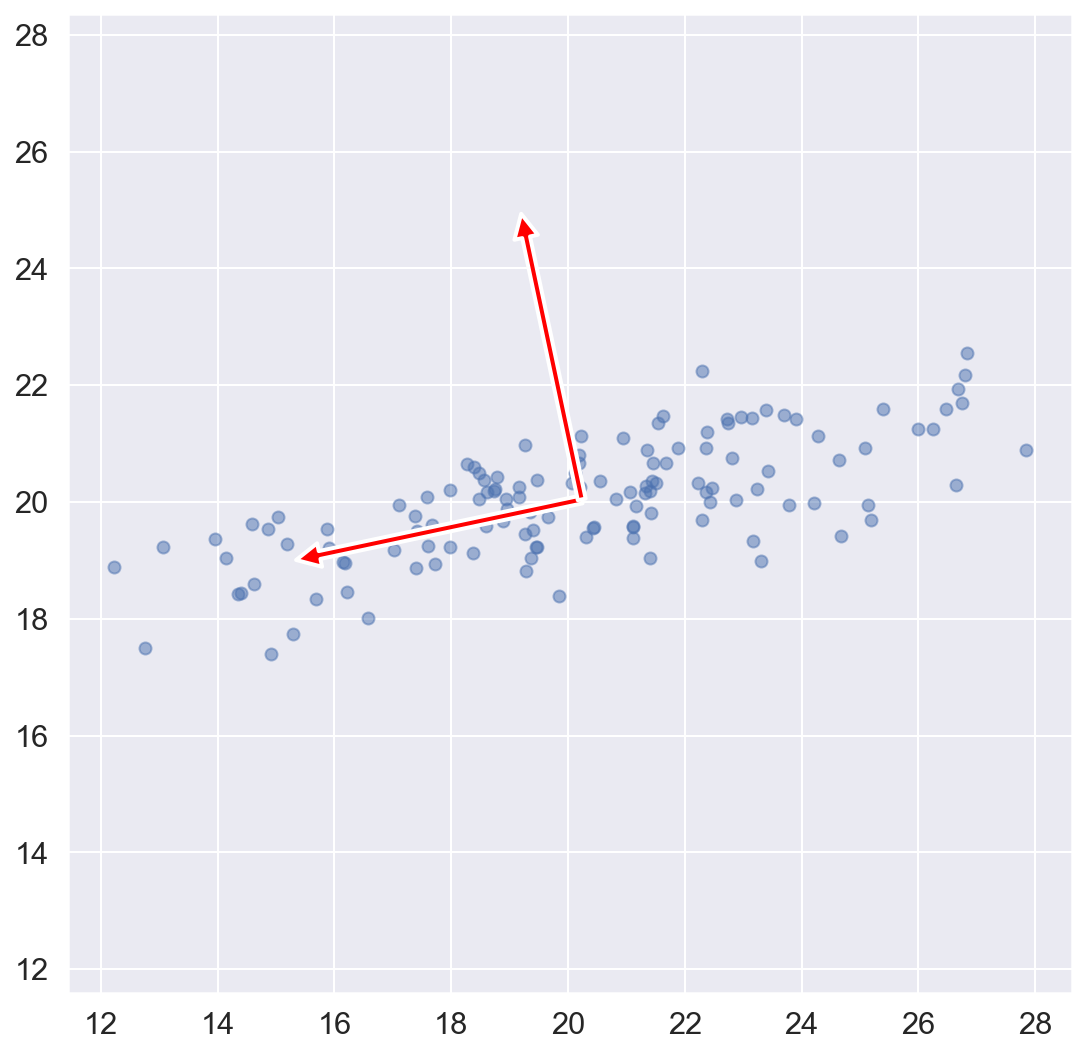

In [3]:
from matplotlib.colors import LogNorm
from sklearn import mixture
from sklearn.decomposition import PCA

def draw_vector(v0, v1, ax):
    arrowprops=dict(linewidth=2,
                    shrinkA=0,
                    shrinkB=0,
                    facecolor='red')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

n_samples = 128
np.random.seed(0)

C = np.array([[0., -0.7], [3.5, .7]])
X_train = np.dot(np.random.randn(n_samples, 2), C) + np.array([20, 20])

fig, ax = plt.subplots()
ax.scatter(X_train[:, 0], X_train[:, 1], alpha=0.5)

pca = PCA(n_components=2)
pca.fit(X_train)

print('Components : {}'.format(pca.components_))
print('Explained Variance : {}'.format(pca.explained_variance_))
print('Mean : {}'.format(pca.mean_))

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 5
    draw_vector(pca.mean_, pca.mean_ + v, ax)
ax.axis('equal')
ax.plot()

[]

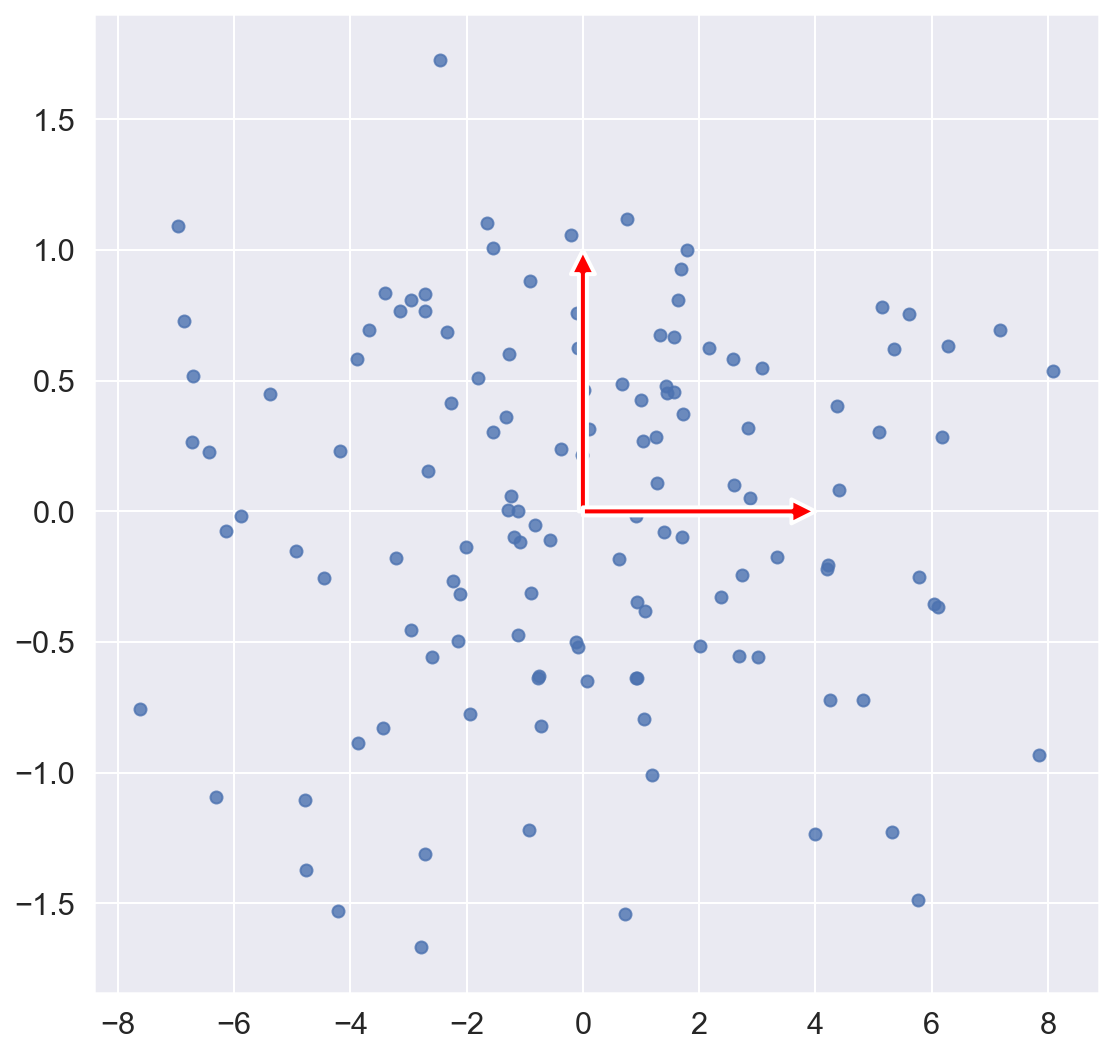

In [4]:
X_transformed = pca.transform(X_train)
fig, ax = plt.subplots()
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.8)
mean = np.array([0, 0])
draw_vector(mean, mean + np.array([0,1]), ax)
draw_vector(mean, mean + np.array([4,0]), ax)
ax.plot()

Size of X' : (128, 1)


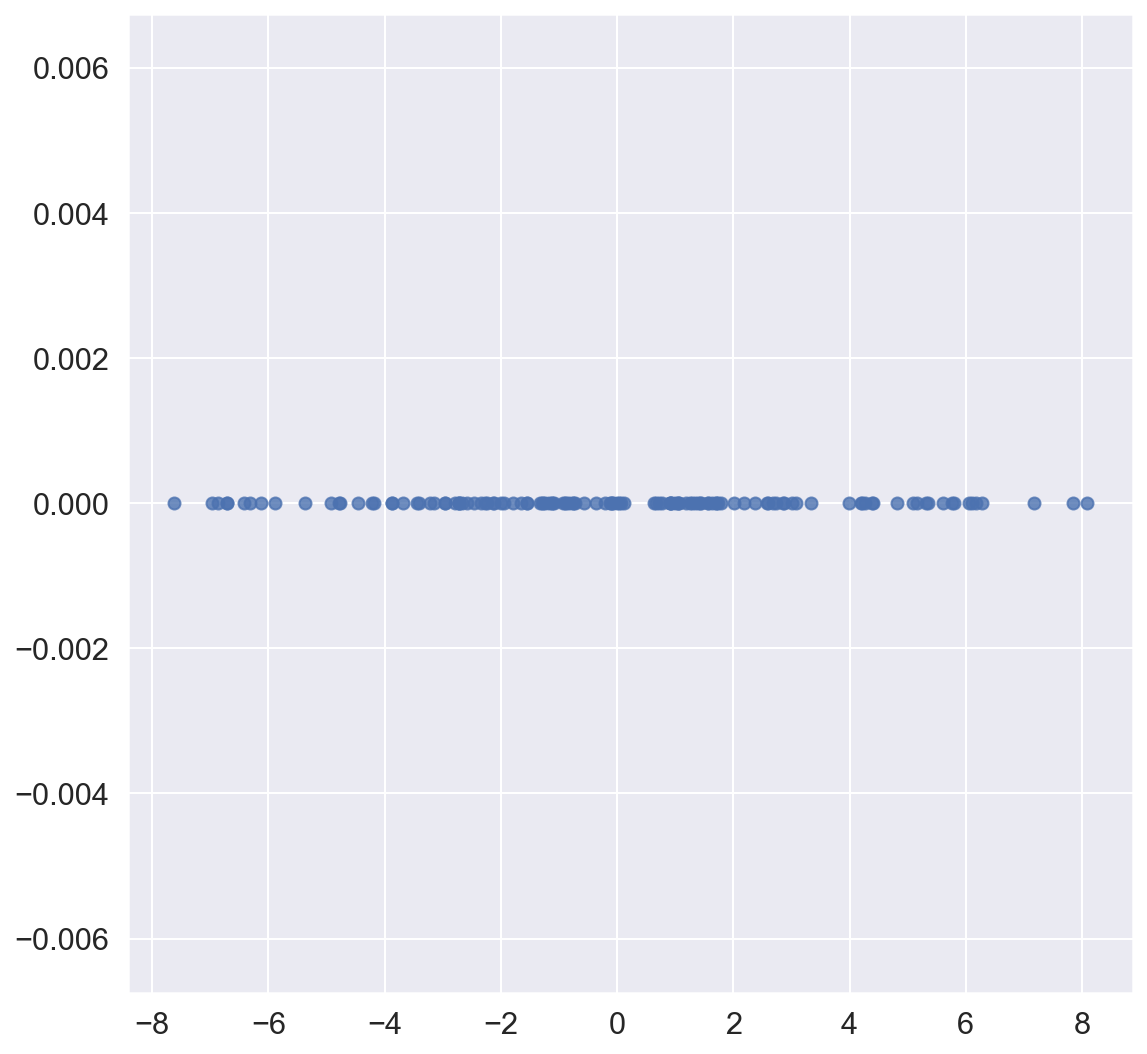

In [5]:
pca = PCA(n_components=1)
pca.fit(X_train)
X_pca = pca.transform(X_train)
plt.scatter(X_pca, np.zeros(len(X_pca)), alpha=0.8)
plt.plot()

print("Size of X' : {}".format(X_pca.shape))

[]

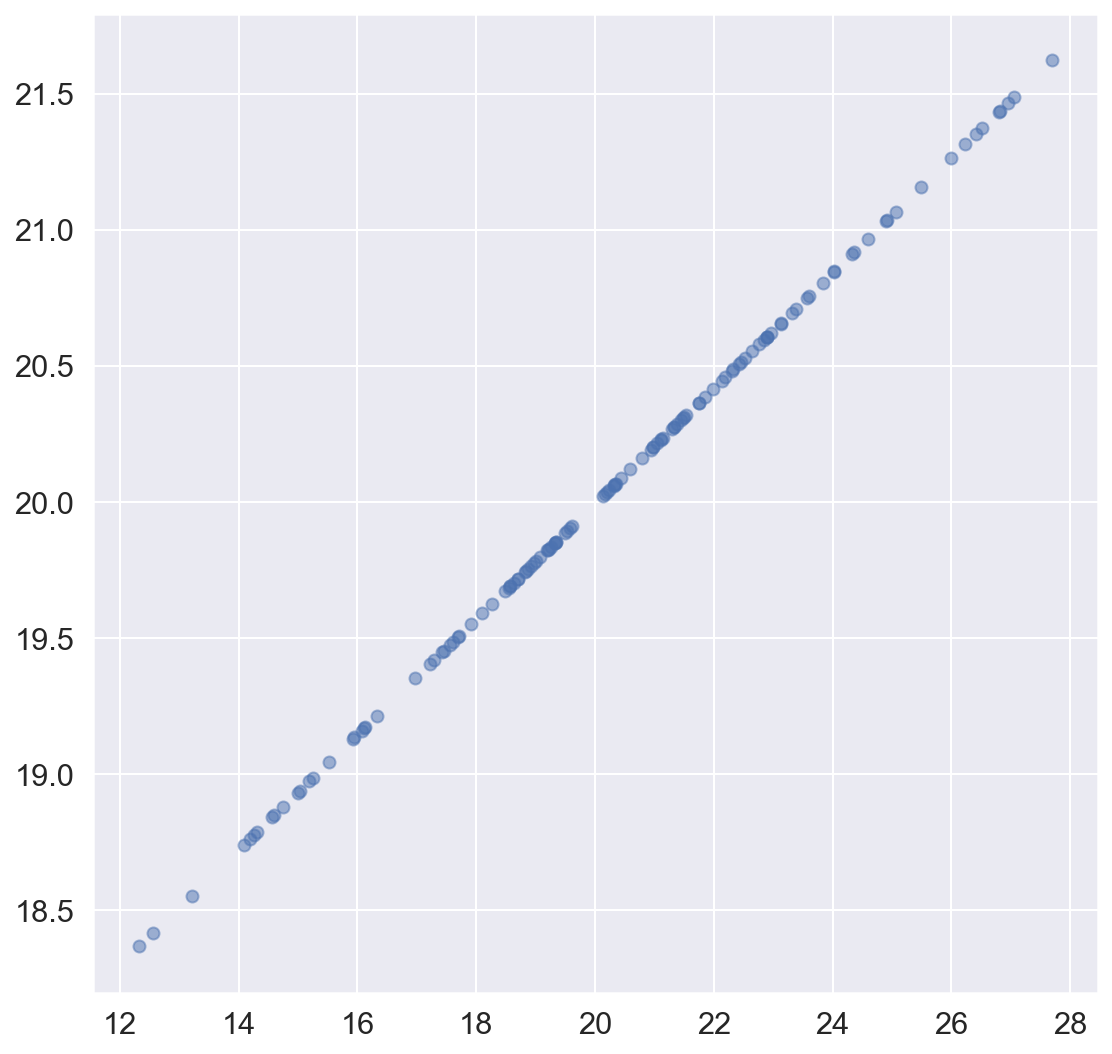

In [6]:
X_pca_inverse = pca.inverse_transform(X_pca)
fig, ax = plt.subplots()
ax.scatter(X_pca_inverse[:, 0], X_pca_inverse[:, 1], alpha=0.5)
ax.plot()

The optional keyword argument `whiten=True` makes it possible to project the data onto the singular space while scaling each component to unit variance. 

The optional keyword argument `svd_solver` which can take `{'auto', 'full', 'arpack', 'randomized'}`. Where for efficieny on large datasets we can use `randomized` when we are dropping the dimension significantly (Which limits the computation to an approximation of the singular vectors).

## Incremental PCA

`PCA` only supports batch processing, which means all of the data to be processed must fit in main memory which can be an issue. The `IncrementalPCA` object uses a different form of processing and allows for partial computations which almost exactly match the results of PCA while processing the data in a minibatch fashion. `IncrementalPCA` makes it possible to implement out-of-core Principal Component Analysis either by:
* Using its `partial_fit` method on chunks of data fetched sequentially from the local hard drive or a network database.
* Calling its fit method on a sparse matrix or a memory mapped file using `numpy.memmap`.

`IncrementalPCA` only stores estimates of component and noise variances, in order update `explained_variance_ratio_` incrementally. This is why memory usage depends on the number of samples per batch, rather than the number of samples to be processed in the dataset.

As in `PCA`, `IncrementalPCA` centers but does not scale the input data for each feature before applying SVD.

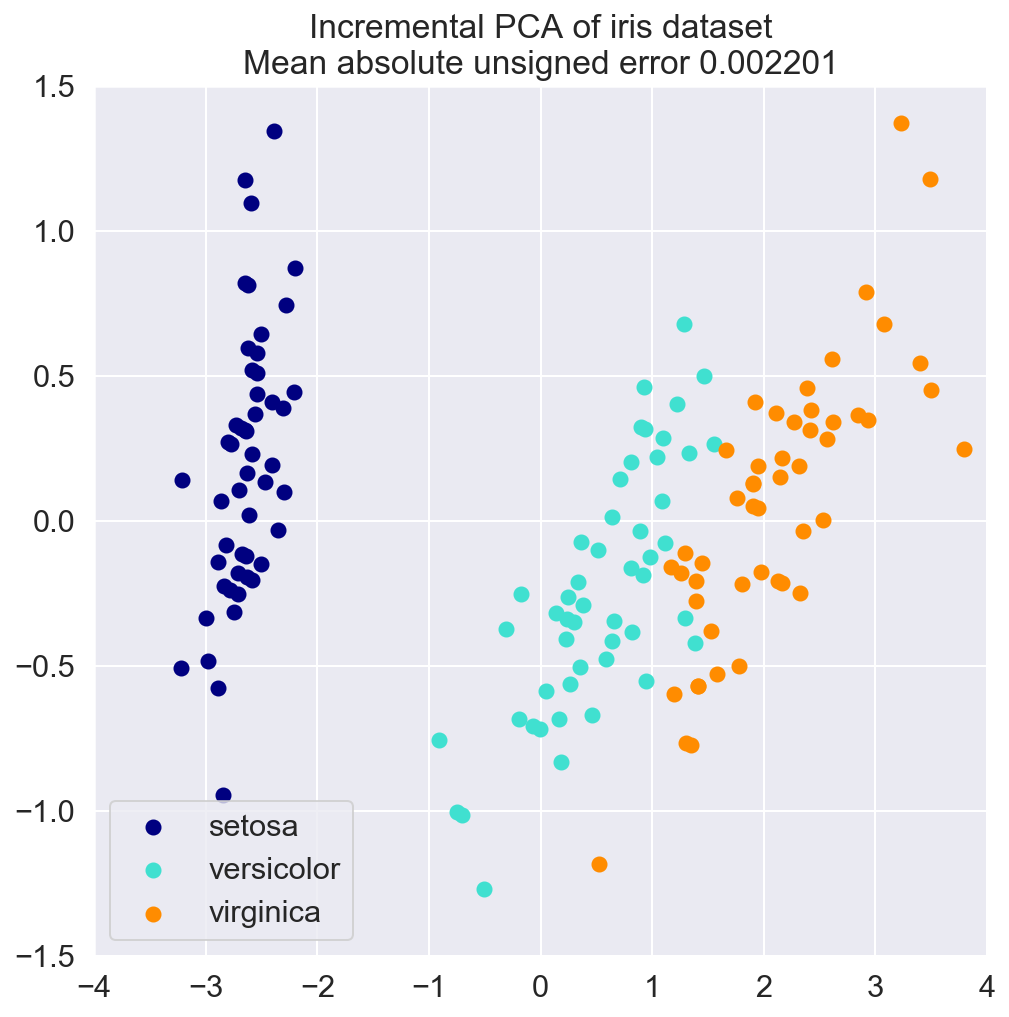

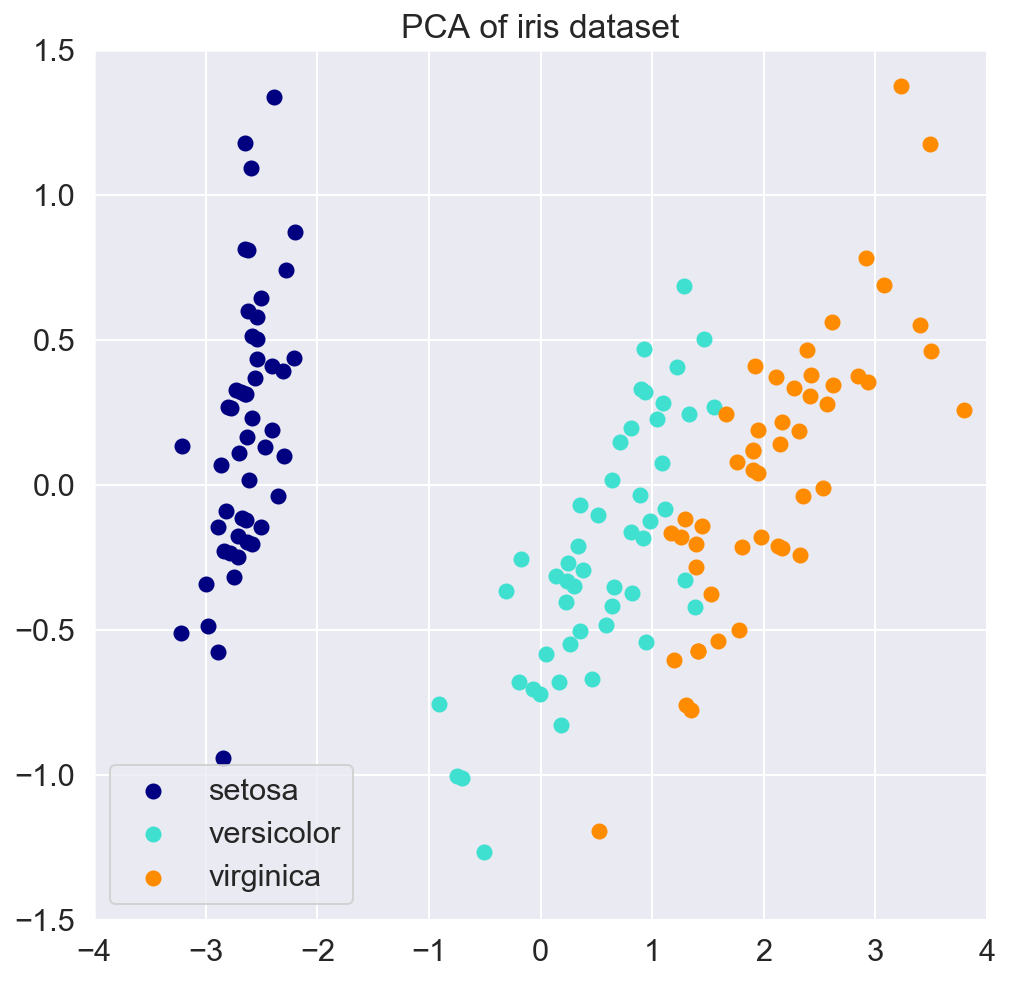

In [7]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

iris = load_iris()
X = iris.data
y = iris.target

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ['navy', 'turquoise', 'darkorange']

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color=color, lw=2, label=target_name)

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error "
                  "%.6f" % err)
    else:
        plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

## Kernel PCA

`KernelPCA` is an extension of PCA which achieves non-linear dimensionality reduction through the use of `sklearn`'s supported kernels. It has many applications including denoising, compression and structured prediction (kernel dependency estimation). KernelPCA supports both `transform` and `inverse_transform`.

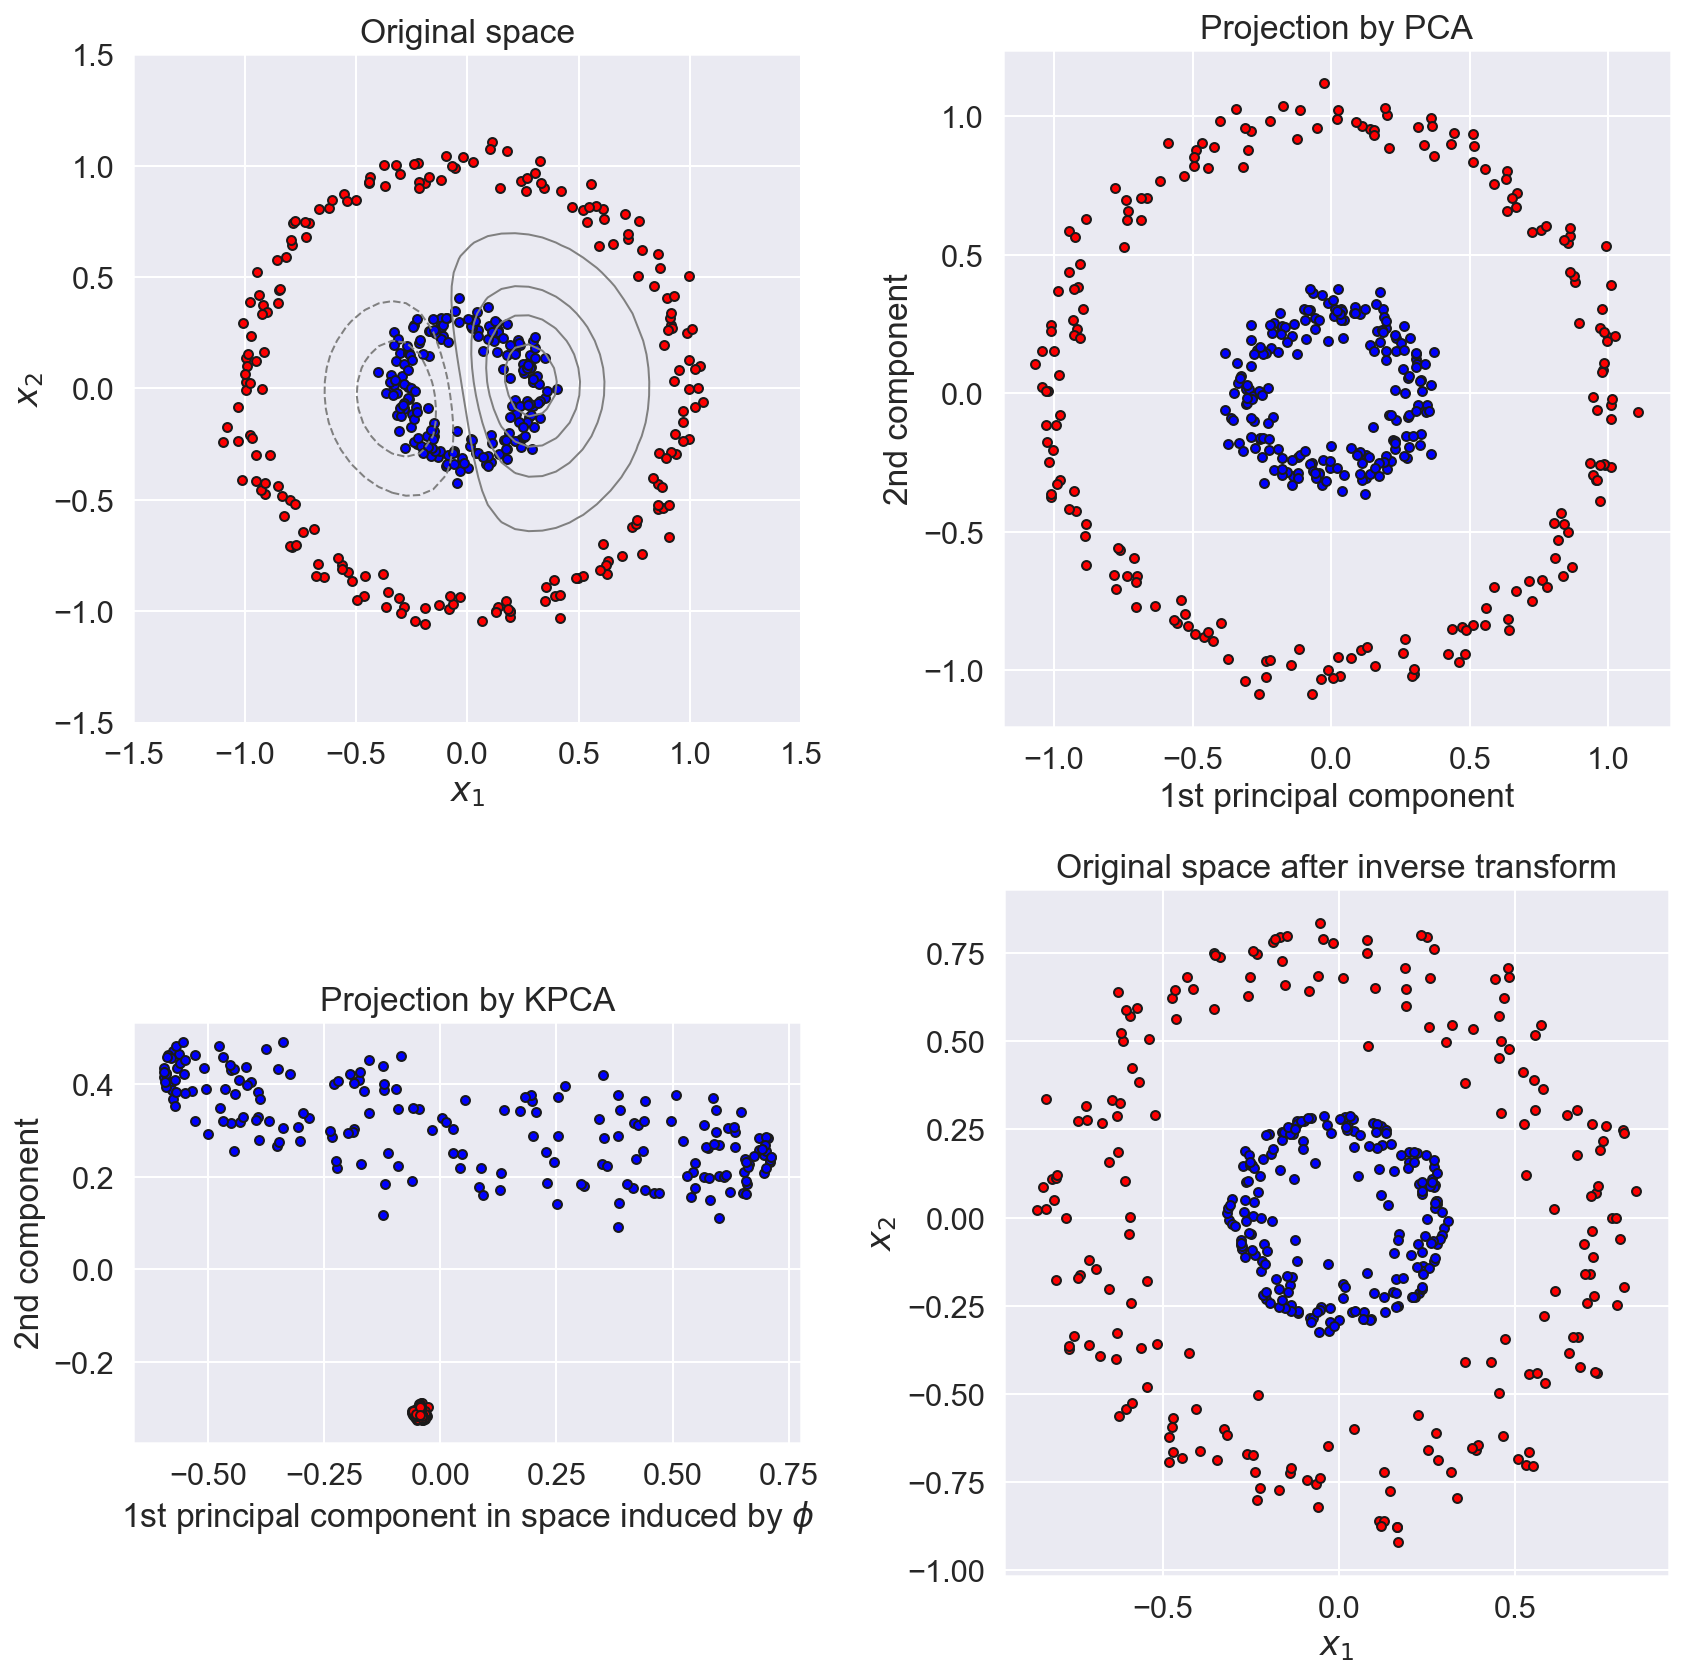

In [8]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.tight_layout()
plt.show()

In the example above, Kernel PCA is able to find a projection of the data that makes data linearly separable.

## Dictionary learning

### Sparse dictionary learning

Sparse dictionary learning aims at finding a sparse representation of the input data (also known as sparse coding) in the form of a linear combination of basic elements as well as those basic elements themselves. These elements are called atoms and they compose a dictionary. Atoms in the dictionary are not required to be orthogonal, and they may be an over-complete spanning set. This problem setup also allows the dimensionality of the signals being represented to be higher than the one of the signals being observed. The above two properties lead to having seemingly redundant atoms that allow multiple representations of the same signal but also provide an improvement in sparsity and flexibility of the representation.

One of the most important applications of sparse dictionary learning is in the field of compressed sensing or signal recovery. In compressed sensing, a high-dimensional signal can be recovered with only a few linear measurements provided that the signal is sparse or nearly sparse. Since not all signals satisfy this sparsity condition, it is of great importance to find a sparse representation of that signal such as the wavelet transform or the directional gradient of a rasterized matrix. Once a matrix or a high dimensional vector is transferred to a sparse space, different recovery algorithms like basis pursuit, CoSaMP or fast non-iterative algorithms can be used to recover the signal.

One of the key principles of dictionary learning is that the dictionary has to be inferred from the input data. The emergence of sparse dictionary learning methods was stimulated by the fact that in signal processing one typically wants to represent the input data using as few components as possible. Before this approach the general practice was to use predefined dictionaries (such as fourier or wavelet transforms). However, in certain cases a dictionary that is trained to fit the input data can significantly improve the sparsity, which has applications in data decomposition, compression and analysis and has been used in the fields of image denoising and classification, video and audio processing. Sparsity and overcomplete dictionaries have immense applications in image compression, image fusion and inpainting.

The `SparseCoder` object is an estimator
that can be used to transform signals into sparse linear combination of
atoms from a fixed, precomputed dictionary such as a discrete wavelet
basis. This object therefore does not implement a `fit` method. The
transformation amounts to a sparse coding problem: finding a
representation of the data as a linear combination of as few dictionary
atoms as possible. All variations of dictionary learning implement the
following transform methods, controllable via the `transform_method`
initialization parameter:

-   Orthogonal matching pursuit (`omp`)
-   Least-angle regression (`least_angle_regression`)
-   Lasso computed by least-angle regression
-   Lasso using coordinate descent (`lasso`)
-   Thresholding

Thresholding is very fast but it does not yield accurate
reconstructions. They have been shown useful in literature for
classification tasks. For image reconstruction tasks, orthogonal
matching pursuit yields the most accurate, unbiased reconstruction.

The dictionary learning objects offer, via the `split_code` parameter,
the possibility to separate the positive and negative values in the
results of sparse coding. This is useful when dictionary learning is
used for extracting features that will be used for supervised learning,
because it allows the learning algorithm to assign different weights to
negative loadings of a particular atom, from to the corresponding
positive loading.

The split code for a single sample has length `2 * n_components` and is
constructed using the following rule: First, the regular code of length
`n_components` is computed. Then, the first `n_components` entries of
the `split_code` are filled with the positive part of the regular code
vector. The second half of the split code is filled with the negative
part of the code vector, only with a positive sign. Therefore, the
split\_code is non-negative.

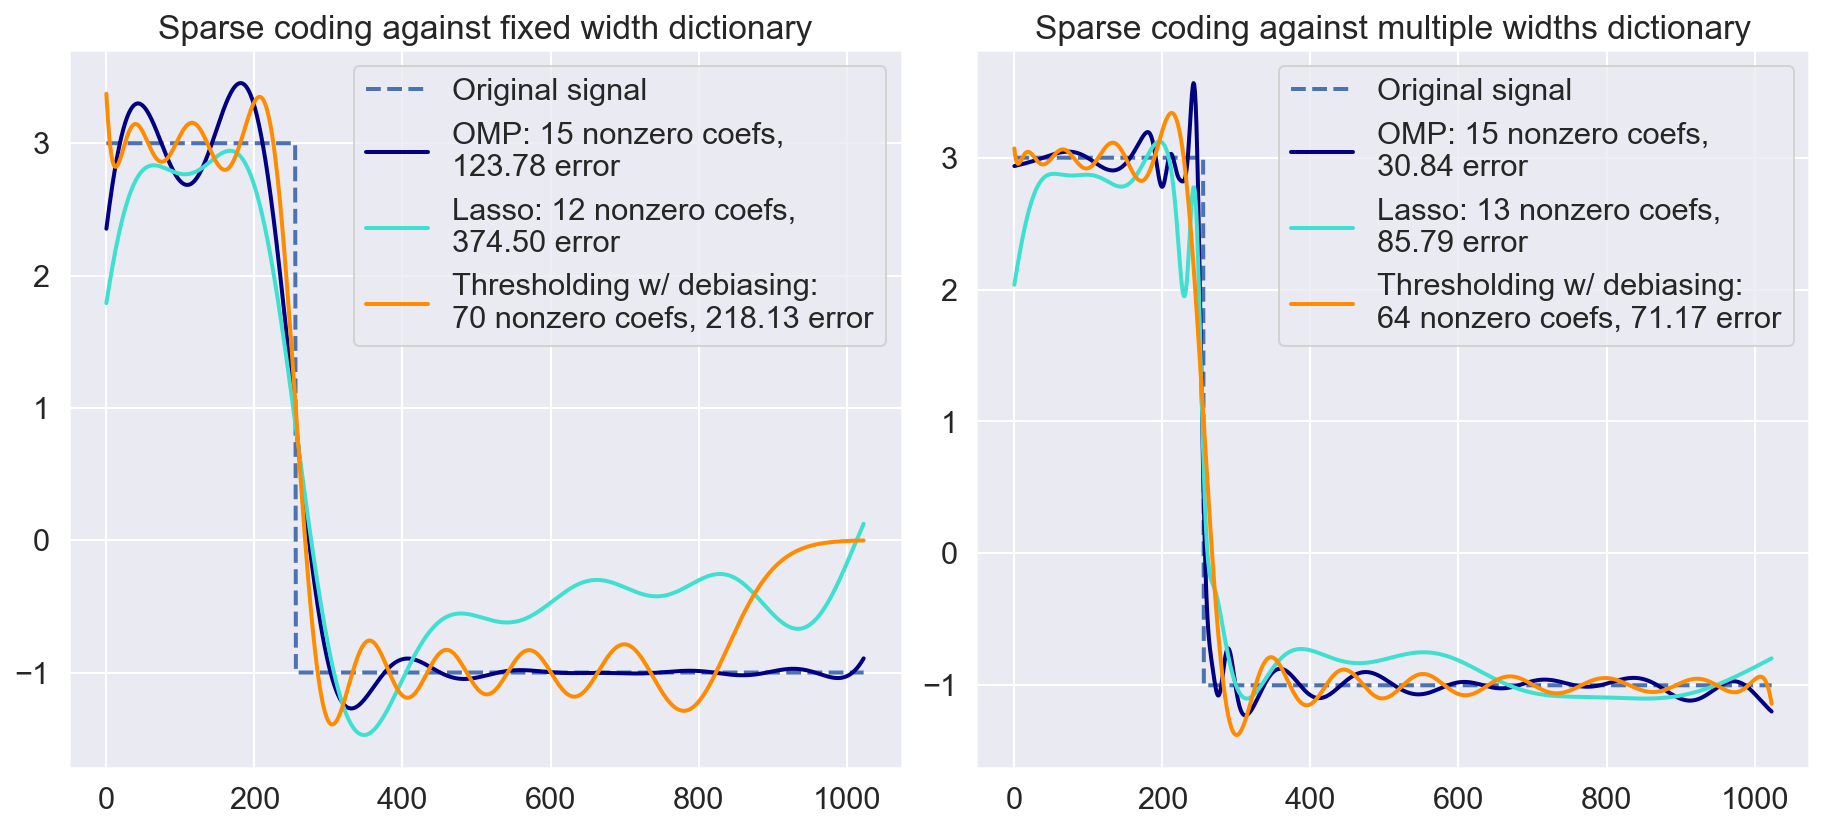

In [9]:
from distutils.version import LooseVersion

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import SparseCoder


def ricker_function(resolution, center, width):
    """Discrete sub-sampled Ricker (Mexican hat) wavelet"""
    x = np.linspace(0, resolution - 1, resolution)
    x = ((2 / (np.sqrt(3 * width) * np.pi ** .25))
         * (1 - (x - center) ** 2 / width ** 2)
         * np.exp(-(x - center) ** 2 / (2 * width ** 2)))
    return x


def ricker_matrix(width, resolution, n_components):
    """Dictionary of Ricker (Mexican hat) wavelets"""
    centers = np.linspace(0, resolution - 1, n_components)
    D = np.empty((n_components, resolution))
    for i, center in enumerate(centers):
        D[i] = ricker_function(resolution, center, width)
    D /= np.sqrt(np.sum(D ** 2, axis=1))[:, np.newaxis]
    return D


resolution = 1024
subsampling = 3  # subsampling factor
width = 100
n_components = resolution // subsampling

# Compute a wavelet dictionary
D_fixed = ricker_matrix(width=width, resolution=resolution,
                        n_components=n_components)
D_multi = np.r_[tuple(ricker_matrix(width=w, resolution=resolution,
                      n_components=n_components // 5)
                for w in (10, 50, 100, 500, 1000))]

# Generate a signal
y = np.linspace(0, resolution - 1, resolution)
first_quarter = y < resolution / 4
y[first_quarter] = 3.
y[np.logical_not(first_quarter)] = -1.

# List the different sparse coding methods in the following format:
# (title, transform_algorithm, transform_alpha,
#  transform_n_nozero_coefs, color)
estimators = [('OMP', 'omp', None, 15, 'navy'),
              ('Lasso', 'lasso_lars', 2, None, 'turquoise'), ]
lw = 2
# Avoid FutureWarning about default value change when numpy >= 1.14
lstsq_rcond = None if LooseVersion(np.__version__) >= '1.14' else -1

plt.figure(figsize=(13, 6))
for subplot, (D, title) in enumerate(zip((D_fixed, D_multi),
                                         ('fixed width', 'multiple widths'))):
    plt.subplot(1, 2, subplot + 1)
    plt.title('Sparse coding against %s dictionary' % title)
    plt.plot(y, lw=lw, linestyle='--', label='Original signal')
    # Do a wavelet approximation
    for title, algo, alpha, n_nonzero, color in estimators:
        coder = SparseCoder(dictionary=D, transform_n_nonzero_coefs=n_nonzero,
                            transform_alpha=alpha, transform_algorithm=algo)
        x = coder.transform(y.reshape(1, -1))
        density = len(np.flatnonzero(x))
        x = np.ravel(np.dot(x, D))
        squared_error = np.sum((y - x) ** 2)
        plt.plot(x, color=color, lw=lw,
                 label='%s: %s nonzero coefs,\n%.2f error'
                 % (title, density, squared_error))

    # Soft thresholding debiasing
    coder = SparseCoder(dictionary=D, transform_algorithm='threshold',
                        transform_alpha=20)
    x = coder.transform(y.reshape(1, -1))
    _, idx = np.where(x != 0)
    x[0, idx], _, _, _ = np.linalg.lstsq(D[idx, :].T, y, rcond=lstsq_rcond)
    x = np.ravel(np.dot(x, D))
    squared_error = np.sum((y - x) ** 2)
    plt.plot(x, color='darkorange', lw=lw,
             label='Thresholding w/ debiasing:\n%d nonzero coefs, %.2f error'
             % (len(idx), squared_error))
    plt.axis('tight')
    plt.legend(shadow=False, loc='best')
plt.subplots_adjust(.04, .07, .97, .90, .09, .2)
plt.show()

#### /\ Example : Sparse coding with a precomputed dictionary

Transform a signal as a sparse combination of Ricker wavelets. This example visually compares different sparse coding methods using the sklearn.decomposition.SparseCoder estimator. The Ricker (also known as Mexican hat or the second derivative of a Gaussian) is not a particularly good kernel to represent piecewise constant signals like this one. It can therefore be seen how much adding different widths of atoms matters and it therefore motivates learning the dictionary to best fit your type of signals.

The richer dictionary on the right is not larger in size, heavier subsampling is performed in order to stay on the same order of magnitude.

### Generic dictionary learning

Dictionary learning is a matrix factorization problem that amounts to finding a (usually overcomplete) dictionary that will perform well at sparsely encoding the fitted data.

Representing data as sparse combinations of atoms from an overcomplete dictionary is suggested to be the way the mammalian primary visual cortex works. Consequently, dictionary learning applied on image patches has been shown to give good results in image processing tasks such as image completion, inpainting and denoising, as well as for supervised recognition tasks.

Dictionary learning is an optimization problem solved by alternatively updating the sparse code, as a solution to multiple Lasso problems, considering the dictionary fixed, and then updating the dictionary to best fit the sparse code.

$$ \begin{split}(U^*, V^*) = \underset{U, V}{\operatorname{arg\,min\,}} & \frac{1}{2}
             ||X-UV||_2^2+\alpha||U||_1 \\
             \text{subject to } & ||V_k||_2 = 1 \text{ for all }
             0 \leq k < n_{\mathrm{atoms}}\end{split} $$

Dataset consists of 400 faces
Extracting the top 6 MiniBatchDictionaryLearning...
done in 0.455s


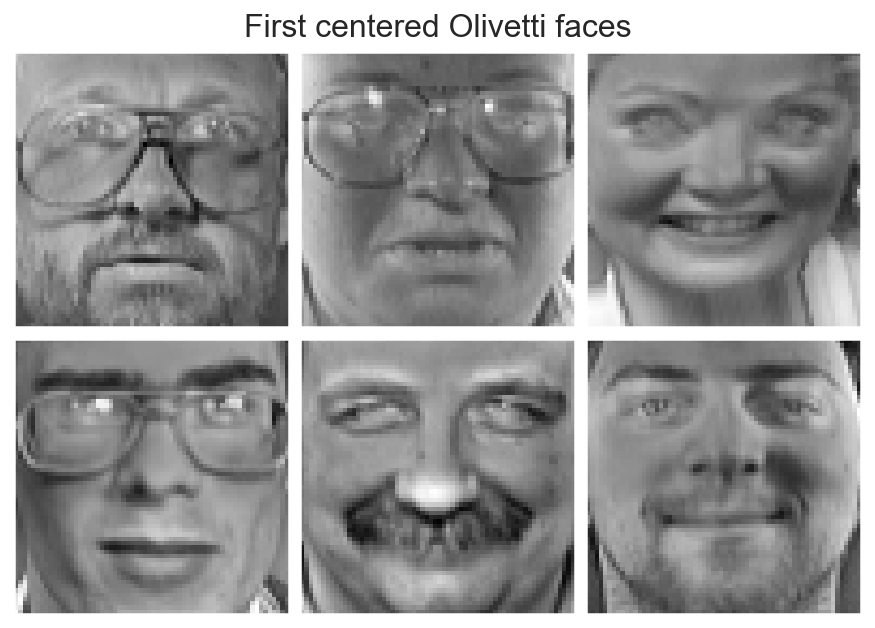

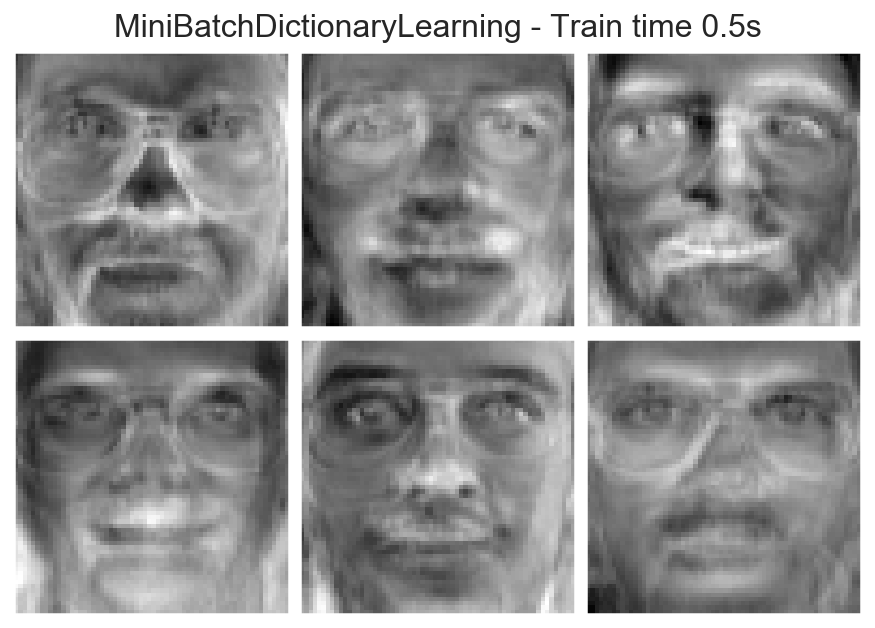

Extracting the top 6 Dictionary learning...
done in 0.417s
Extracting the top 6 Dictionary learning - positive dictionary...
done in 0.422s
Extracting the top 6 Dictionary learning - positive code...
done in 0.113s
Extracting the top 6 Dictionary learning - positive dictionary & code...
done in 0.142s


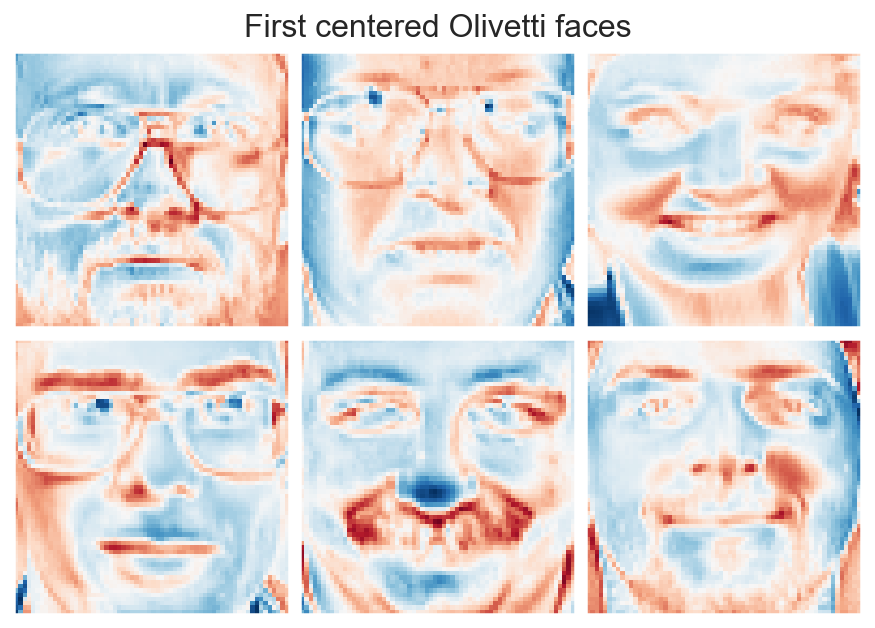

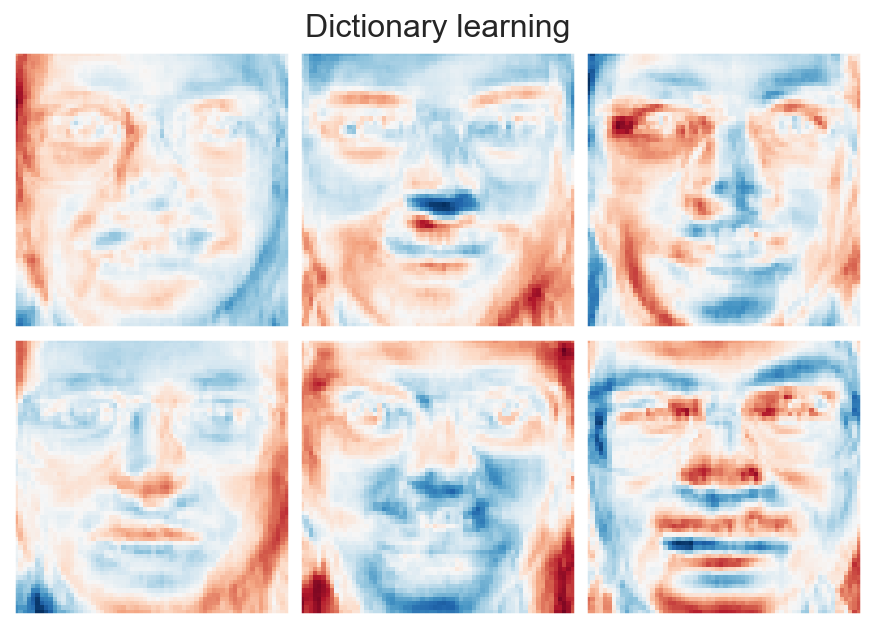

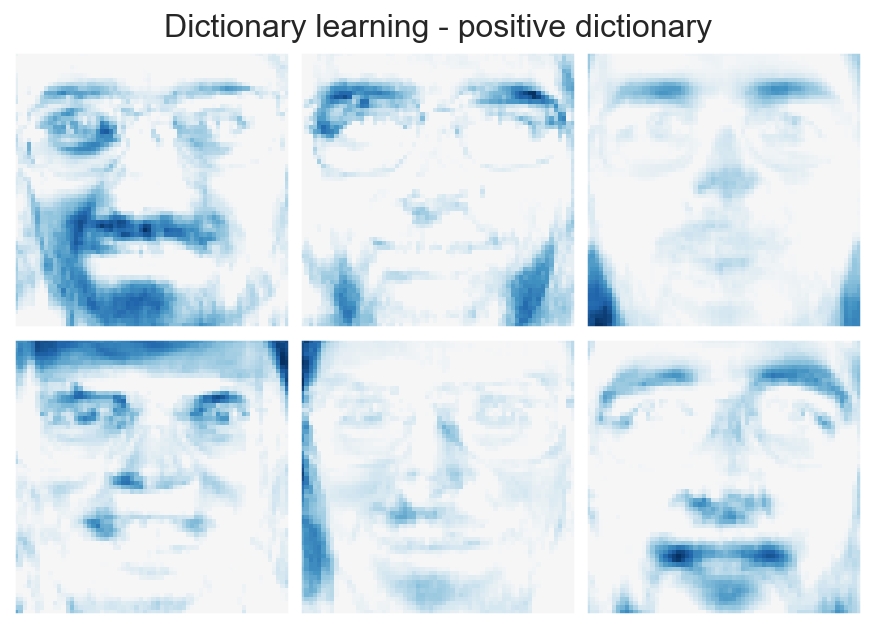

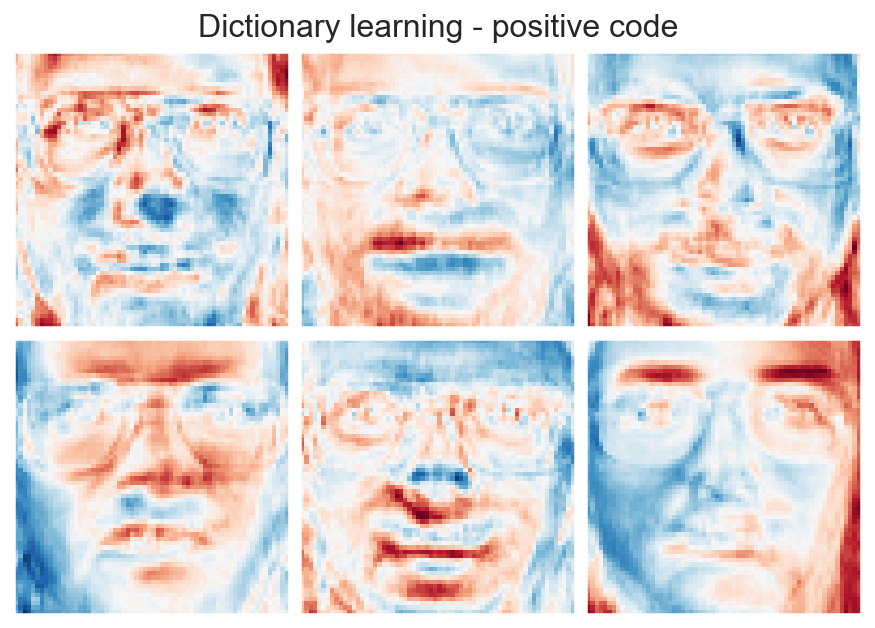

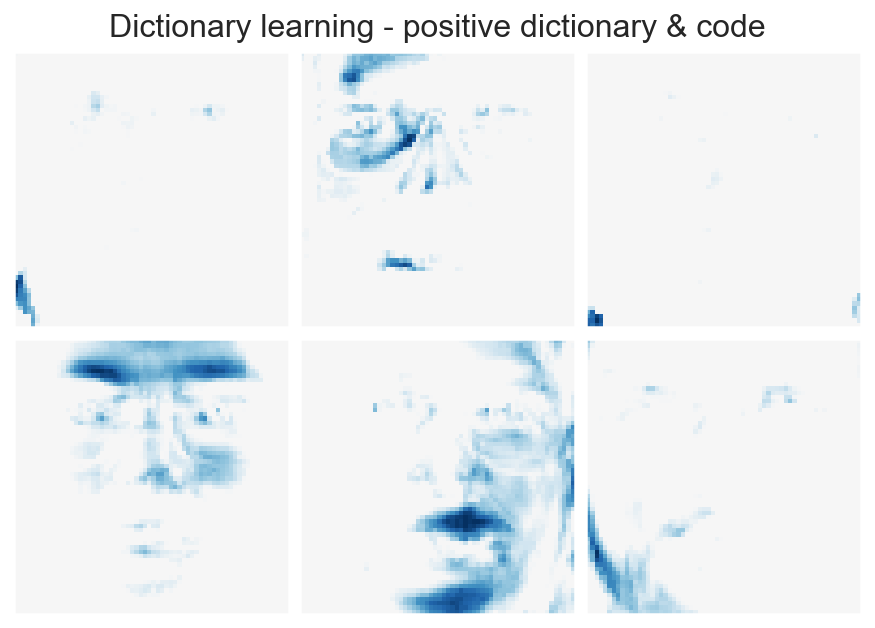

In [10]:
import logging
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

# #############################################################################
# Load faces data
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True,
                                random_state=rng)
n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

# #############################################################################
# List of the different estimators, whether to center and transpose the
# problem, and whether the transformer uses the clustering API.
estimator = [
    ('MiniBatchDictionaryLearning',
        decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
                                                  n_iter=50, batch_size=3,
                                                  random_state=rng),
     True)
]


# #############################################################################
# Plot a sample of the input data

plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

# #############################################################################
# Do the estimation and plot it

for name, estimator, center in estimator:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_

    # Plot an image representing the pixelwise variance provided by the
    # estimator e.g its noise_variance_ attribute. The Eigenfaces estimator,
    # via the PCA decomposition, also provides a scalar noise_variance_
    # (the mean of pixelwise variance) that cannot be displayed as an image
    # so we skip it.
    if (hasattr(estimator, 'noise_variance_') and
            estimator.noise_variance_.ndim > 0):  # Skip the Eigenfaces case
        plot_gallery("Pixelwise variance",
                     estimator.noise_variance_.reshape(1, -1), n_col=1,
                     n_row=1)
    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                 components_[:n_components])

plt.show()

# #############################################################################
# Various positivity constraints applied to dictionary learning.
estimators = [
    ('Dictionary learning',
        decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
                                                  n_iter=50, batch_size=3,
                                                  random_state=rng),
     True),
    ('Dictionary learning - positive dictionary',
        decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
                                                  n_iter=50, batch_size=3,
                                                  random_state=rng,
                                                  positive_dict=True),
     True),
    ('Dictionary learning - positive code',
        decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
                                                  n_iter=50, batch_size=3,
                                                  fit_algorithm='cd',
                                                  random_state=rng,
                                                  positive_code=True),
     True),
    ('Dictionary learning - positive dictionary & code',
        decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
                                                  n_iter=50, batch_size=3,
                                                  fit_algorithm='cd',
                                                  random_state=rng,
                                                  positive_dict=True,
                                                  positive_code=True),
     True),
]


# #############################################################################
# Plot a sample of the input data

plot_gallery("First centered Olivetti faces", faces_centered[:n_components],
             cmap=plt.cm.RdBu)

# #############################################################################
# Do the estimation and plot it

for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    components_ = estimator.components_
    plot_gallery(name, components_[:n_components], cmap=plt.cm.RdBu)

plt.show()

`MiniBatchDictionaryLearning` implements a faster, but less accurate version of the dictionary learning algorithm that is better suited for large datasets.

By default, `MiniBatchDictionaryLearning` divides the data into mini-batches and optimizes in an online manner by cycling over the mini-batches for the specified number of iterations. However, at the moment it does not implement a stopping condition.

The estimator also implements `partial_fit`, which updates the dictionary by iterating only once over a mini-batch. This can be used for online learning when the data is not readily available from the start, or for when the data does not fit into the memory.

## Factor analysis


Factor analysis is a statistical method used to describe variability among observed, correlated variables in terms of a potentially lower number of unobserved variables called **factors**. For example, it is possible that variations in six observed variables mainly reflect the variations in two unobserved (underlying) variables. Factor analysis searches for such joint variations in response to unobserved latent variables. The observed variables are modelled as linear combinations of the potential factors, plus "error" terms. Factor analysis aims to find independent latent variables. The theory behind factor analytic methods is that the information gained about the interdependencies between observed variables can be used later to reduce the set of variables in a dataset.

Factor analysis is related to principal component analysis (PCA), but the two are not identical.There has been significant controversy in the field over differences between the two techniques (see section on exploratory factor analysis versus principal components analysis below). PCA can be considered as a more basic version of exploratory factor analysis (EFA) that was developed in the early days prior to the advent of high-speed computers. Both PCA and factor analysis aim to reduce the dimensionality of a set of data, but the approaches taken to do so are different for the two techniques. Factor analysis is clearly designed with the objective to identify certain unobservable factors from the observed variables, whereas PCA does not directly address this objective; at best, PCA provides an approximation to the required factors. From the point of view of exploratory analysis, the eigenvalues of PCA are inflated component loadings, i.e., contaminated with error variance.

#### Decomposition

In unsupervised learning we only have a dataset
$X = \{x_1, x_2, \dots, x_n
\}$. How can this dataset be described mathematically? A very simple
continuous latent variable model for $X$ is

$$x_i = W h_i + \mu + \epsilon$$

The vector $h_i$ is called \"latent\" because it is unobserved.
$\epsilon$ is considered a noise term distributed according to a
Gaussian with mean 0 and covariance $\Psi$ (i.e.
$\epsilon \sim \mathcal{N}(0, \Psi)$), $\mu$ is some arbitrary offset
vector. Such a model is called \"generative\" as it describes how $x_i$
is generated from $h_i$. If we use all the $x_i$\'s as columns to form a
matrix $\mathbf{X}$ and all the $h_i$\'s as columns of a matrix
$\mathbf{H}$ then we can write (with suitably defined $\mathbf{M}$ and
$\mathbf{E}$):

$$\mathbf{X} = W \mathbf{H} + \mathbf{M} + \mathbf{E}$$

In other words, we *decomposed* matrix $\mathbf{X}$.

If $h_i$ is given, the above equation automatically implies the
following probabilistic interpretation:

$$p(x_i|h_i) = \mathcal{N}(Wh_i + \mu, \Psi)$$

For a complete probabilistic model we also need a prior distribution for
the latent variable $h$. The most straightforward assumption (based on
the nice properties of the Gaussian distribution) is
$h \sim \mathcal{N}(0,
\mathbf{I})$. This yields a Gaussian as the marginal distribution of
$x$:

$$p(x) = \mathcal{N}(\mu, WW^T + \Psi)$$

Now, without any further assumptions the idea of having a latent
variable $h$ would be superfluous \-- $x$ can be completely modelled
with a mean and a covariance. We need to impose some more specific
structure on one of these two parameters. A simple additional assumption
regards the structure of the error covariance $\Psi$:

-   $\Psi = \sigma^2 \mathbf{I}$: This assumption leads to the
    probabilistic model of `PCA`.
-   $\Psi = \mathrm{diag}(\psi_1, \psi_2, \dots, \psi_n)$: This model is
    called `FactorAnalysis`, a classical
    statistical model. The matrix W is sometimes called the \"factor
    loading matrix\".

Both models essentially estimate a Gaussian with a low-rank covariance
matrix. Because both models are probabilistic they can be integrated in
more complex models, e.g. Mixture of Factor Analysers. One gets very
different models (e.g. `FastICA`) if
non-Gaussian priors on the latent variables are assumed.

Factor analysis *can* produce similar components (the columns of its
loading matrix) to `PCA`. However, one
can not make any general statements about these components (e.g. whether
they are orthogonal):


Components : [[-3.27884498 -0.72266752]
 [-0.          0.        ]]
Noise Variance : [0.97700588 0.48871717]
Mean : [20.23416889 20.04390541]


[]

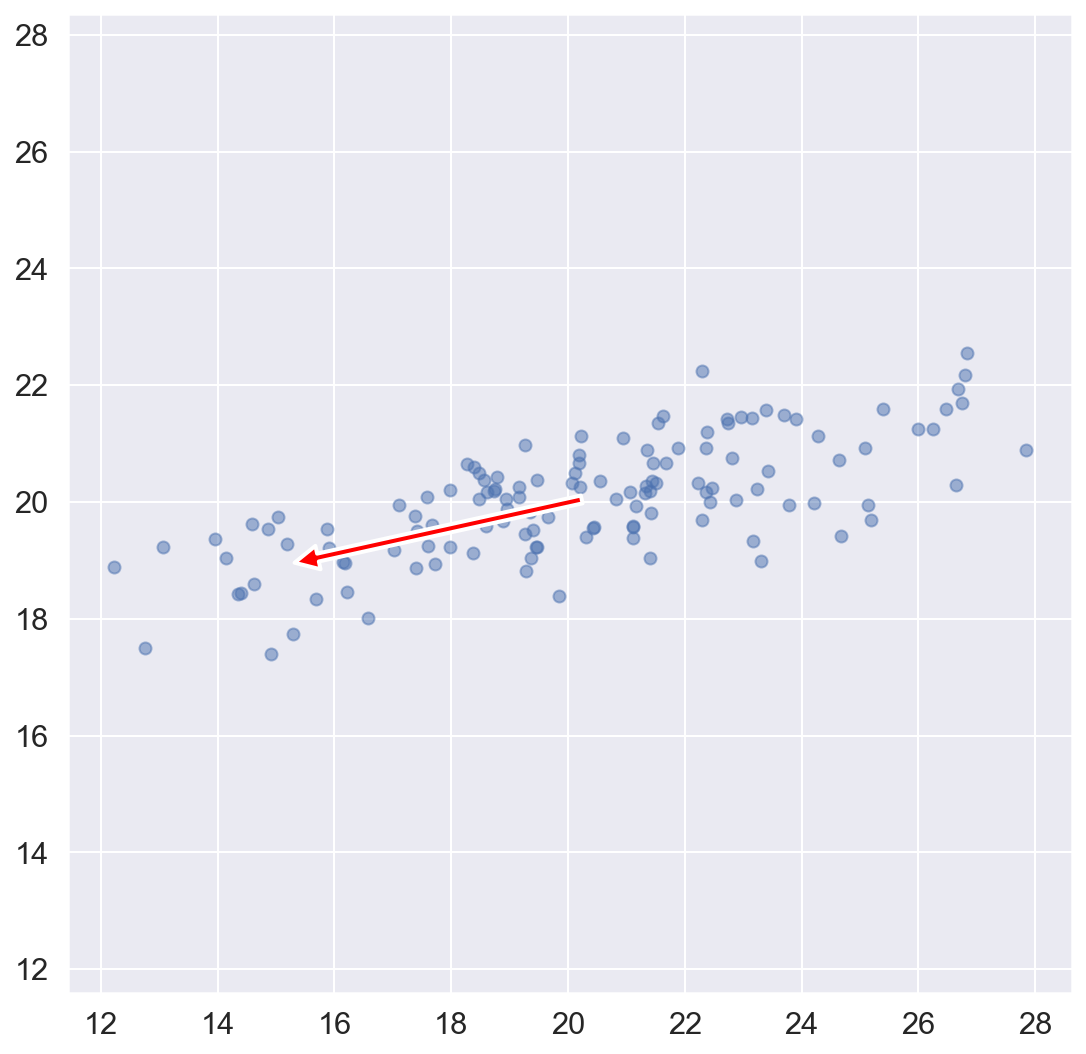

In [11]:
from matplotlib.colors import LogNorm
from sklearn import mixture
from sklearn.decomposition import FactorAnalysis

n_samples = 128
np.random.seed(0)

C = np.array([[0., -0.7], [3.5, .7]])
X_train = np.dot(np.random.randn(n_samples, 2), C) + np.array([20, 20])

fig, ax = plt.subplots()
ax.scatter(X_train[:, 0], X_train[:, 1], alpha=0.5)

fa = FactorAnalysis(n_components=2)
fa.fit(X_train)

print('Components : {}'.format(fa.components_))
print('Noise Variance : {}'.format(fa.noise_variance_))
print('Mean : {}'.format(fa.mean_))

for vector in fa.components_:
    v = vector * 1.5
    draw_vector(fa.mean_, fa.mean_ + v, ax)
ax.axis('equal')
ax.plot()

The main advantage for Factor Analysis over PCA is that it can model the variance in every direction of the input space independently (heteroscedastic noise). This allows better model selection than probabilistic PCA in the presence of heteroscedastic noise (variance of the noise random variables are different).

Applications within finance : https://ocw.mit.edu/courses/mathematics/18-s096-topics-in-mathematics-with-applications-in-finance-fall-2013/lecture-notes/MIT18_S096F13_lecnote15.pdf

## Independent component analysis (ICA)

Independent component analysis (ICA) is a computational method for separating a multivariate signal into additive subcomponents that are maximally independent. This is done by assuming that the subcomponents are non-Gaussian signals and that they are statistically independent from each other. ICA is a special case of blind source separation. A common example application is the "cocktail party problem" of listening in on one person's speech in a noisy room.

It is implemented in scikit-learn using the `FastICA` algorithm. Typically, ICA is not used for reducing dimensionality but for separating superimposed signals. Since the ICA model does not include a noise term, for the model to be correct, whitening must be applied. This can be done internally using the whiten argument or manually using one of the PCA variants. ICA can also be used as yet another non linear decomposition that finds components with some sparsity.

It is classically used to separate mixed signals (a problem known as blind source separation), as in the example below. Imagine 3 instruments playing simultaneously and 3 microphones recording the mixed signals. ICA is used to recover the sources ie. what is played by each instrument. Importantly, PCA fails at recovering our instruments since the related signals reflect non-Gaussian processes.

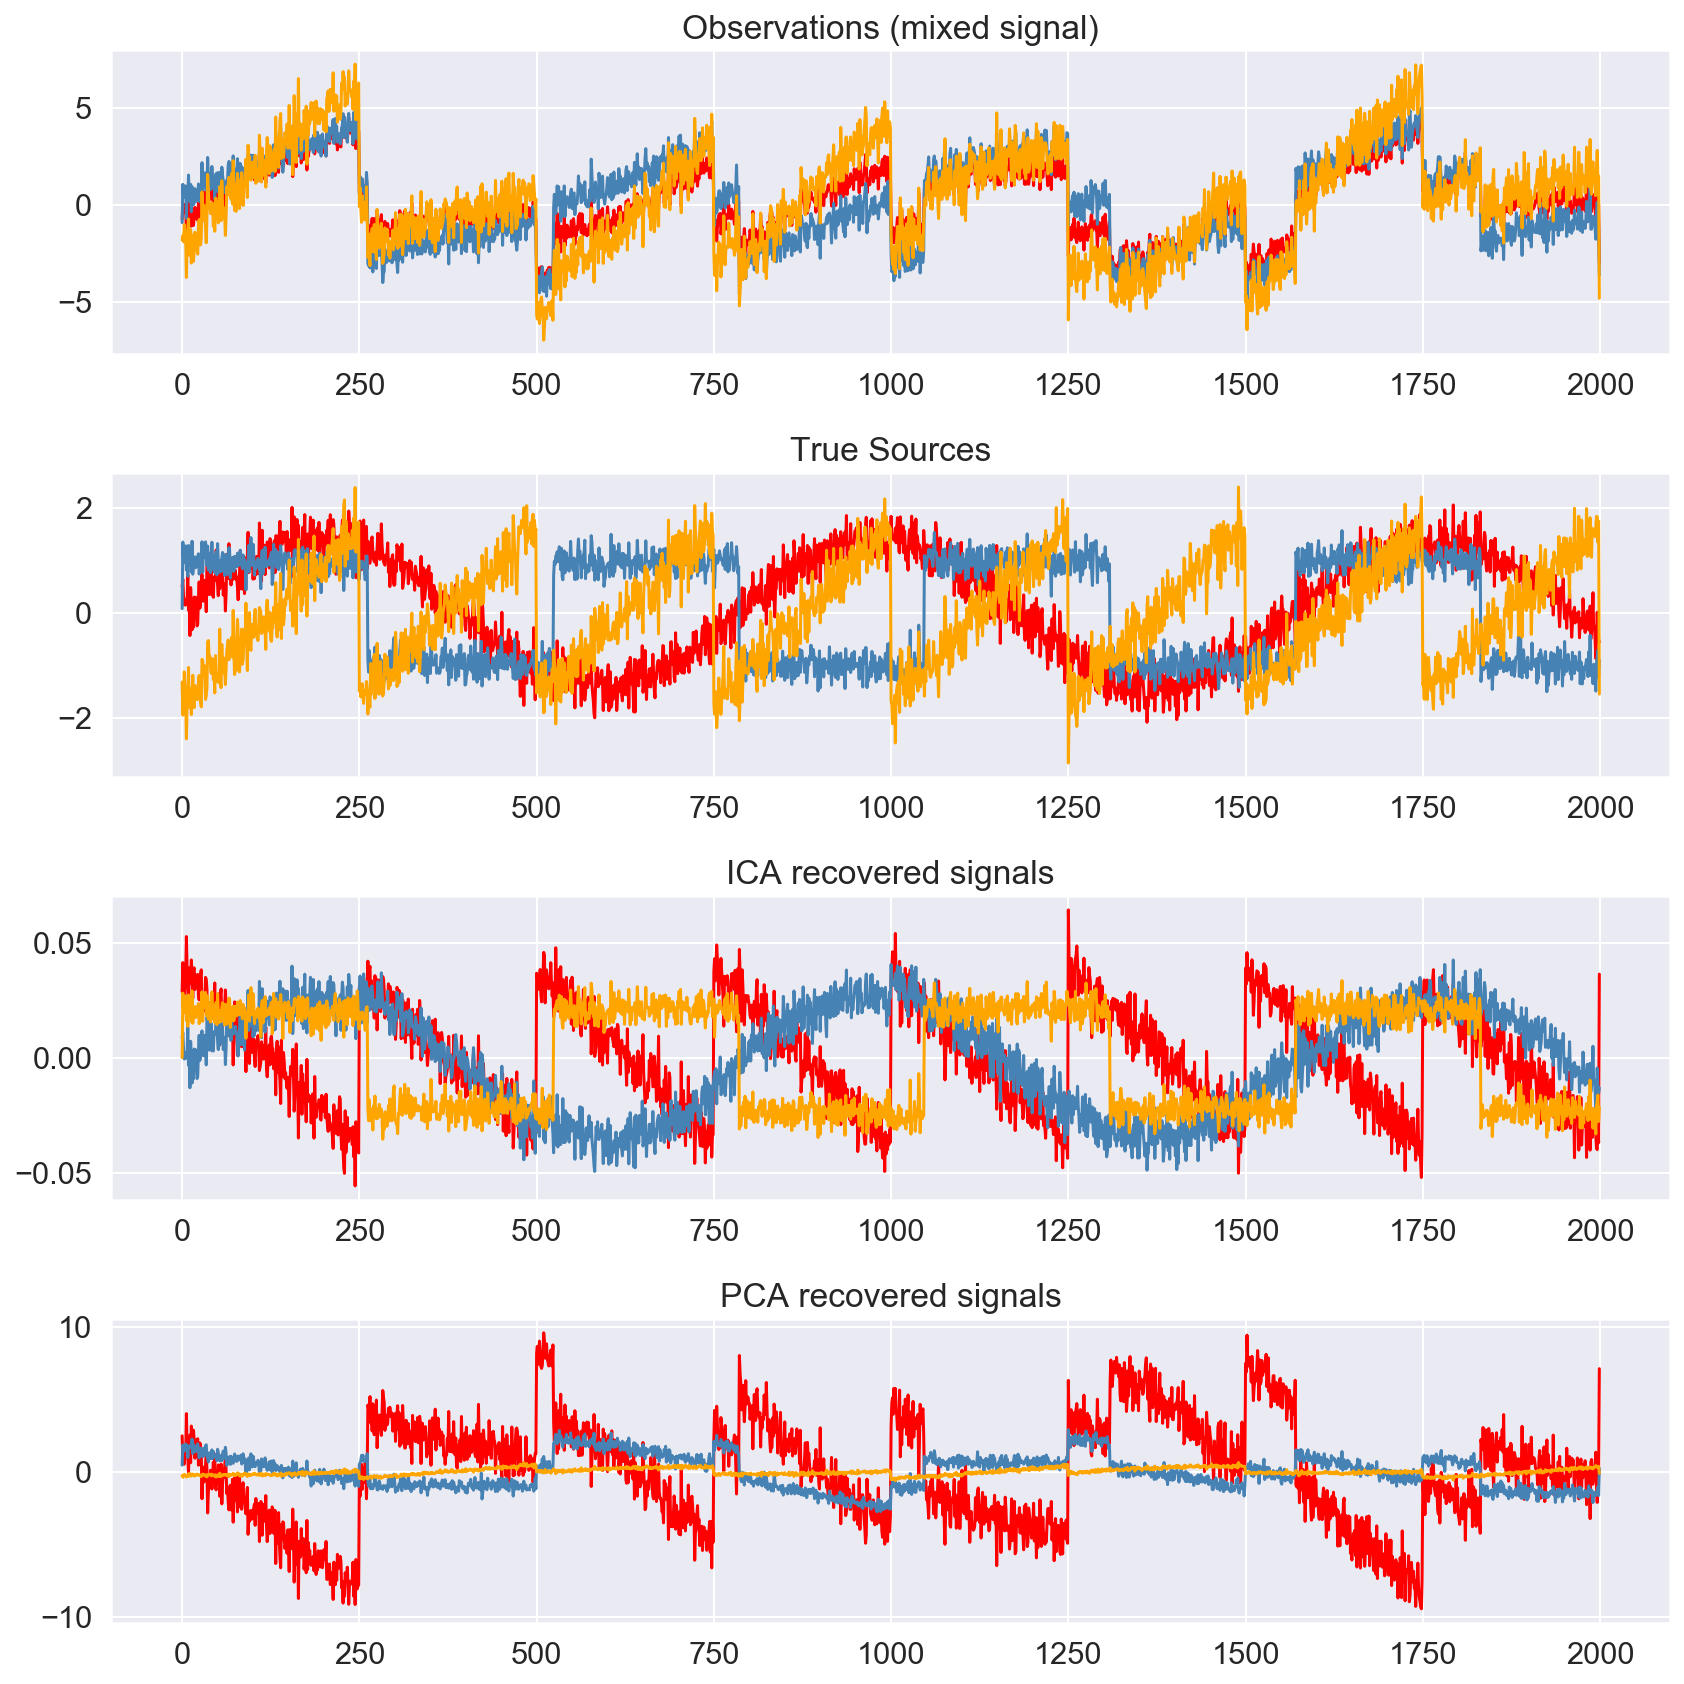

In [12]:
from scipy import signal
from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure(figsize=(12,12))

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

## Non-negative matrix factorization

Non-negative matrix factorization (NMF or NNMF), $X$ is factorized into (usually) two matrices $W$ and $H$, with the property that all three matrices have no negative elements. This non-negativity makes the resulting matrices easier to inspect. Also, in applications such as processing of audio spectrograms or muscular activity, non-negativity is inherent to the data being considered. Since the problem is not exactly solvable in general, it is commonly approximated numerically.

The decomposition of samples $X$ into two matrices $W$ and $H$ of
non-negative elements is done by optimizing the distance $d$ between $X$ and
the matrix product $WH$. The most widely used distance function is the
squared Frobenius norm, which is an obvious extension of the Euclidean
norm to matrices:

$$d_{\mathrm{Fro}}(X, Y) = \frac{1}{2} ||X - Y||_{\mathrm{Fro}}^2 = \frac{1}{2} \sum_{i,j} (X_{ij} - {Y}_{ij})^2$$

Unlike `PCA`, the representation of a
vector is obtained in an additive fashion, by superimposing the
components, without subtracting. Such additive models are efficient for
representing images and text.

It has been observed in \[Hoyer, 2004\] that, when carefully
constrained, `NMF` can produce a
parts-based representation of the dataset, resulting in interpretable
models.

W : Shape (128, 2)
H : [[13.59886472 10.25888875]
 [ 0.          7.40645382]]
Reconstruction Error : 0.09714603101663133


[]

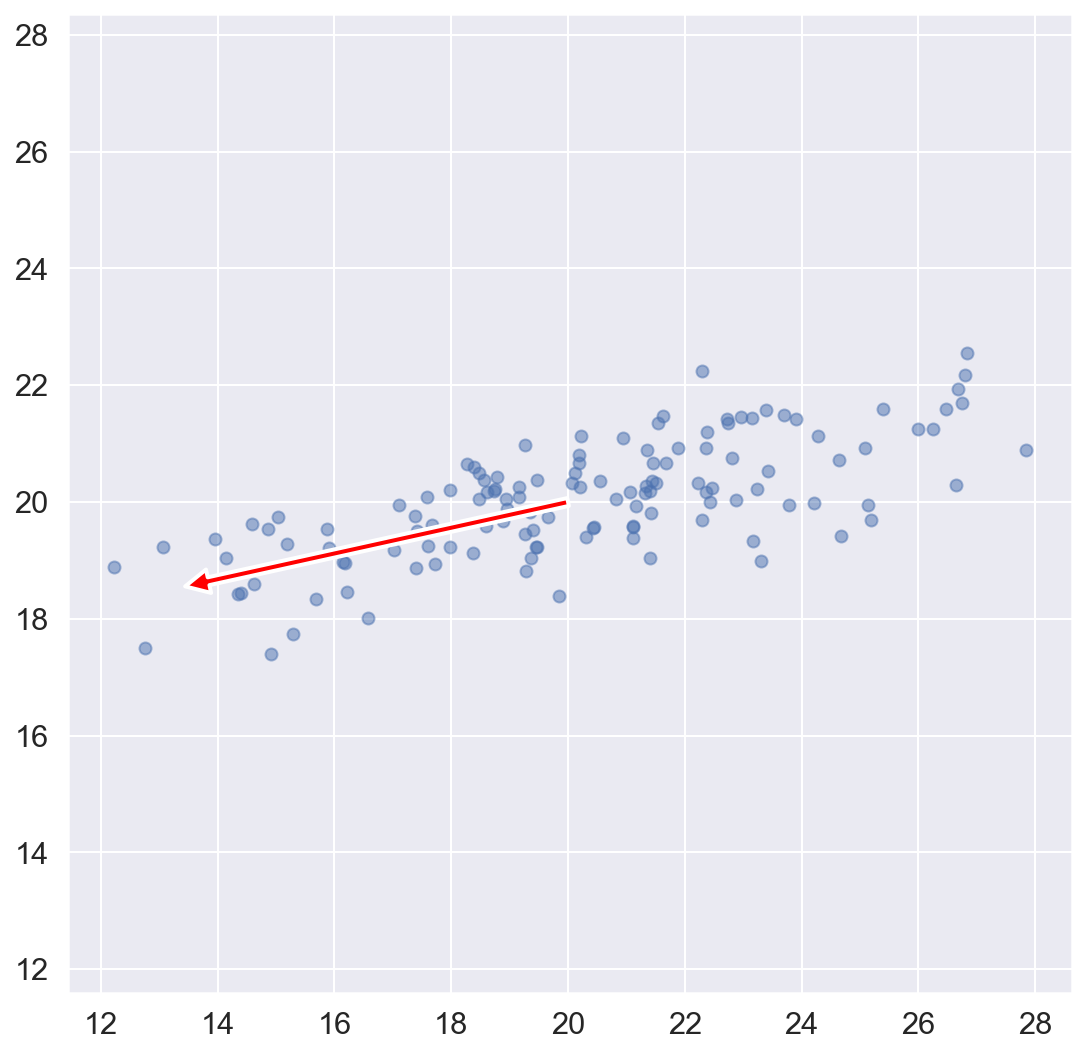

In [13]:
from matplotlib.colors import LogNorm
from sklearn import mixture
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize

n_samples = 128
np.random.seed(0)

C = np.array([[0., -0.7], [3.5, .7]])
X_train = np.dot(np.random.randn(n_samples, 2), C) + np.array([20, 20])
fig, ax = plt.subplots()
ax.scatter(X_train[:, 0], X_train[:, 1], alpha=0.5)

clf = NMF(n_components=2)
W = clf.fit_transform(X_train)
H = clf.components_

print('W : Shape {}'.format(W.shape))
print('H : {}'.format(H))
print('Reconstruction Error : {}'.format(clf.reconstruction_err_))

for vector in fa.components_:
    v = vector * 2
    draw_vector(np.array([20, 20]), np.array([20, 20]) + v, ax)
ax.axis('equal')
ax.plot()

The `init` attribute determines the
initialization method applied, which has a great impact on the
performance of the method. `NMF`
implements the method Nonnegative Double Singular Value Decomposition.
NNDSVD is based on two SVD processes, one approximating the data matrix,
the other approximating positive sections of the resulting partial SVD
factors utilizing an algebraic property of unit rank matrices. The basic
NNDSVD algorithm is better fit for sparse factorization. Its variants
NNDSVDa (in which all zeros are set equal to the mean of all elements of
the data), and NNDSVDar (in which the zeros are set to random
perturbations less than the mean of the data divided by 100) are
recommended in the dense case.

Note that the Multiplicative Update (\'mu\') solver cannot update zeros
present in the initialization, so it leads to poorer results when used
jointly with the basic NNDSVD algorithm which introduces a lot of zeros;
in this case, NNDSVDa or NNDSVDar should be preferred.

`NMF` can also be initialized with
correctly scaled random non-negative matrices by setting
`init="random"`. An integer seed or a
`RandomState` can also be passed to `random_state` to control reproducibility.

In `NMF`, L1 and L2 priors can be added
to the loss function in order to regularize the model. The L2 prior uses
the Frobenius norm, while the L1 prior uses an elementwise L1 norm. As
in `ElasticNet`, we control the
combination of L1 and L2 with the `l1_ratio` ($\rho$) parameter, and the intensity of the regularization
with the `alpha`{.interpreted-text role="attr"} ($\alpha$) parameter.
Then the priors terms are:

$$\alpha \rho ||W||_1 + \alpha \rho ||H||_1
+ \frac{\alpha(1-\rho)}{2} ||W||_{\mathrm{Fro}} ^ 2
+ \frac{\alpha(1-\rho)}{2} ||H||_{\mathrm{Fro}} ^ 2$$

and the regularized objective function is:

$$d_{\mathrm{Fro}}(X, WH)
+ \alpha \rho ||W||_1 + \alpha \rho ||H||_1
+ \frac{\alpha(1-\rho)}{2} ||W||_{\mathrm{Fro}} ^ 2
+ \frac{\alpha(1-\rho)}{2} ||H||_{\mathrm{Fro}} ^ 2$$

`NMF` regularizes both W and H. The
public function `non_negative_factorization` allows a finer control through the
`regularization` attribute, and may
regularize only W, only H, or both.

#### NMF with a beta-divergence

As described previously, the most widely used distance function is the
squared Frobenius norm, which is an obvious extension of the Euclidean
norm to matrices:

$$d_{\mathrm{Fro}}(X, Y) = \frac{1}{2} ||X - Y||_{Fro}^2 = \frac{1}{2} \sum_{i,j} (X_{ij} - {Y}_{ij})^2$$

Other distance functions can be used in NMF as, for example, the
(generalized) Kullback-Leibler (KL) divergence, also referred as
I-divergence:

$$d_{KL}(X, Y) = \sum_{i,j} (X_{ij} \log(\frac{X_{ij}}{Y_{ij}}) - X_{ij} + Y_{ij})$$

Or, the Itakura-Saito (IS) divergence:

$$d_{IS}(X, Y) = \sum_{i,j} (\frac{X_{ij}}{Y_{ij}} - \log(\frac{X_{ij}}{Y_{ij}}) - 1)$$

These three distances are special cases of the beta-divergence family,
with $\beta = 2, 1, 0$ respectively. The beta-divergence are defined by
:

$$d_{\beta}(X, Y) = \sum_{i,j} \frac{1}{\beta(\beta - 1)}(X_{ij}^\beta + (\beta-1)Y_{ij}^\beta - \beta X_{ij} Y_{ij}^{\beta - 1})$$

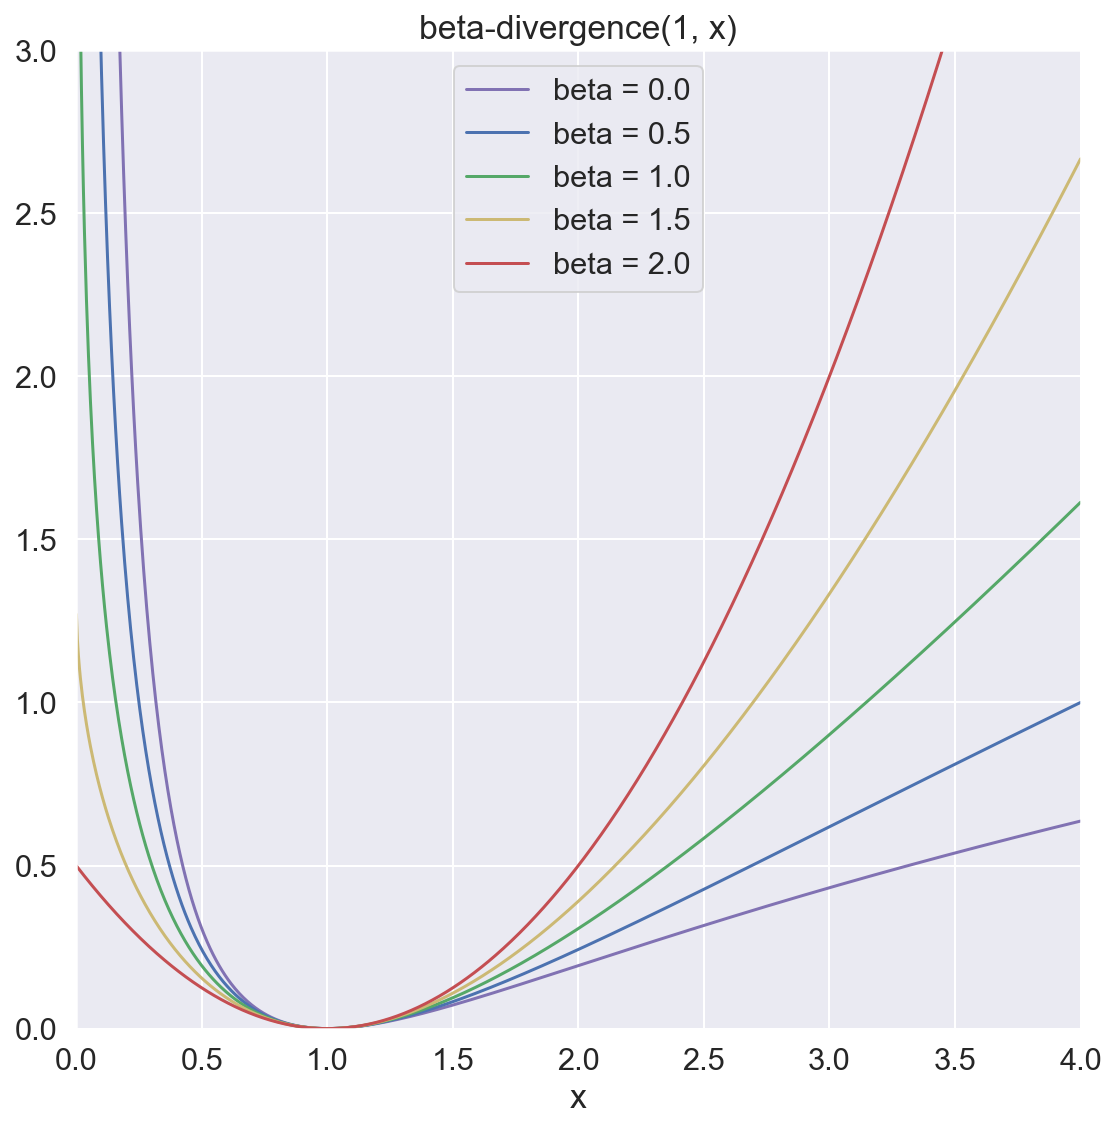

In [14]:
from sklearn.decomposition._nmf import _beta_divergence

x = np.linspace(0.001, 4, 1000)
y = np.zeros(x.shape)

colors = 'mbgyr'
for j, beta in enumerate((0., 0.5, 1., 1.5, 2.)):
    for i, xi in enumerate(x):
        y[i] = _beta_divergence(1, xi, 1, beta)
    name = "beta = %1.1f" % beta
    plt.plot(x, y, label=name, color=colors[j])

plt.xlabel("x")
plt.title("beta-divergence(1, x)")
plt.legend(loc=0)
plt.axis([0, 4, 0, 3])
plt.show()

Note that this definition is not valid if $\beta \in (0; 1)$, yet it can
be continuously extended to the definitions of $d_{KL}$ and $d_{IS}$
respectively.

`NMF` implements two solvers, using
Coordinate Descent (\'cd\'), and Multiplicative Update (\'mu\'). The
\'mu\' solver can optimize every beta-divergence, including of course
the Frobenius norm ($\beta=2$), the (generalized) Kullback-Leibler
divergence ($\beta=1$) and the Itakura-Saito divergence ($\beta=0$).
Note that for $\beta \in (1; 2)$, the \'mu\' solver is significantly
faster than for other values of $\beta$. Note also that with a negative
(or 0, i.e. \'itakura-saito\') $\beta$, the input matrix cannot contain
zero values.

The \'cd\' solver can only optimize the Frobenius norm. Due to the
underlying non-convexity of NMF, the different solvers may converge to
different minima, even when optimizing the same distance function.

NMF is best used with the `fit_transform` method, which returns the
matrix W. The matrix H is stored into the fitted model in the
`components_` attribute; the method `transform` will decompose a new
matrix X\_new based on these stored components:

## Latent Dirichlet allocation 

Latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics. 

The graphical model of LDA is a three-level generative model:

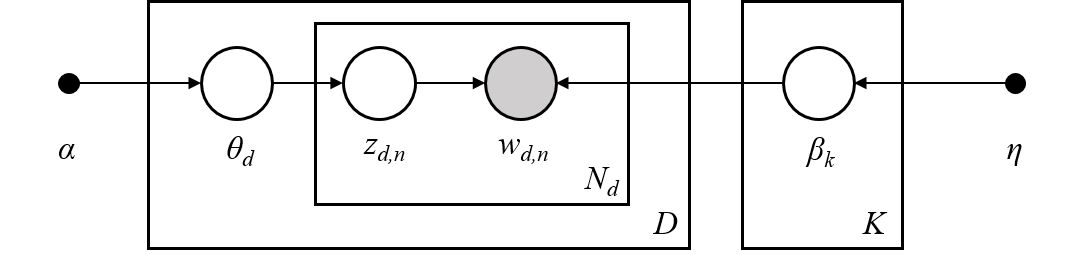
[[2](https://scikit-learn.org/stable/modules/decomposition.html#latentdirichletallocation)]

> Note on notations presented in the graphical model above, which can be found in Hoffman et al. (2013):

With plate notation, which is often used to represent probabilistic graphical models (PGMs), the dependencies among the many variables can be captured concisely. The boxes are "plates" representing replicates, which are repeated entities. The outer plate represents documents, while the inner plate represents the repeated word positions in a given document; each position is associated with a choice of topic and word. The variable names are defined as follows:

> -   The corpus is a collection of $D$ documents.
> -   A document is a sequence of $N$ words.
> -   There are $K$ topics in the corpus.
> -   The boxes represent repeated sampling.

In the graphical model, each node is a random variable and has a role in
the generative process. A shaded node indicates an observed variable and
an unshaded node indicates a hidden (latent) variable. In this case,
words in the corpus are the only data that we observe. The latent
variables determine the random mixture of topics in the corpus and the
distribution of words in the documents. The goal of LDA is to use the
observed words to infer the hidden topic structure.

When modeling text corpora, the model assumes the following generative
process for a corpus with $D$ documents and $K$ topics, with $K$
corresponding to `n_components` in the
API:

> 1.  For each topic $k \in K$, draw $\beta_k \sim 
>     \mathrm{Dirichlet}(\eta)$. This provides a distribution over the
>     words, i.e. the probability of a word appearing in topic $k$.
>     $\eta$ corresponds to `topic_word_prior`{.interpreted-text
>     role="attr"}.
> 2.  For each document $d \in D$, draw the topic proportions
>     $\theta_d \sim \mathrm{Dirichlet}(\alpha)$. $\alpha$ corresponds
>     to `doc_topic_prior`{.interpreted-text role="attr"}.
> 3.  For each word $i$ in document $d$:
>
> > a.  Draw the topic assignment $z_{di} \sim \mathrm{Multinomial}
> >     (\theta_d)$
> > b.  Draw the observed word $w_{ij} \sim \mathrm{Multinomial}
> >     (\beta_{z_{di}})$

For parameter estimation, the posterior distribution is:

$$p(z, \theta, \beta |w, \alpha, \eta) =
\frac{p(z, \theta, \beta|\alpha, \eta)}{p(w|\alpha, \eta)}$$

Since the posterior is intractable, variational Bayesian method uses a
simpler distribution $q(z,\theta,\beta | \lambda, \phi, \gamma)$ to
approximate it, and those variational parameters $\lambda$, $\phi$,
$\gamma$ are optimized to maximize the Evidence Lower Bound (ELBO):

$$\log\: P(w | \alpha, \eta) \geq L(w,\phi,\gamma,\lambda) \overset{\triangle}{=}
E_{q}[\log\:p(w,z,\theta,\beta|\alpha,\eta)] - E_{q}[\log\:q(z, \theta, \beta)]$$

Maximizing ELBO is equivalent to minimizing the Kullback-Leibler(KL)
divergence between $q(z,\theta,\beta)$ and the true posterior
$p(z, \theta, \beta |w, \alpha, \eta)$.

`LatentDirichletAllocation` implements
the online variational Bayes algorithm and supports both online and
batch update methods. While the batch method updates variational
variables after each full pass through the data, the online method
updates variational variables from mini-batch data points.

Although the online method is guaranteed to converge to a local optimum
point, the quality of the optimum point and the speed of convergence may
depend on mini-batch size and attributes related to learning rate
setting.

When `LatentDirichletAllocation` is
applied on a \"document-term\" matrix, the matrix will be decomposed
into a \"topic-term\" matrix and a \"document-topic\" matrix. While
\"topic-term\" matrix is stored as `components_` in the model, \"document-topic\" matrix can be calculated
from `transform` method.

`LatentDirichletAllocation` also
implements `partial_fit` method. This is used when data can be fetched
sequentially.


###### Example

This is an example of applying `sklearn.decomposition.NMF` and `sklearn.decomposition.LatentDirichletAllocation` on a corpus of documents and extract additive models of the topic structure of the corpus. The output is a list of topics, each represented as a list of terms (weights are not shown).

Non-negative Matrix Factorization is applied with two different objective functions: the Frobenius norm, and the generalized Kullback-Leibler divergence. The latter is equivalent to Probabilistic Latent Semantic Indexing.

The default parameters (n_samples / n_features / n_components) should make the example runnable in a couple of tens of seconds. You can try to increase the dimensions of the problem, but be aware that the time complexity is polynomial in NMF. In LDA, the time complexity is proportional to (n_samples * iterations).

In [15]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
data, _ = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'),
                             return_X_y=True)
data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

# Fit the NMF model
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Loading dataset...
done in 1.059s.
Extracting tf-idf features for NMF...
done in 0.241s.
Extracting tf features for LDA...
done in 0.240s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.163s.

Topics in NMF model (Frobenius norm):
Topic #0: just people don think like know time good make way really say right ve want did ll new use years
Topic #1: windows use dos using window program os drivers application help software pc running ms screen files version card code work
Topic #2: god jesus bible faith christian christ christians does heaven sin believe lord life church mary atheism belief human love religion
Topic #3: thanks know does mail advance hi info interested email anybody looking card help like appreciated information send list video need
Topic #4: car cars tires miles 00 new engine insurance price condition oil power speed good 000 brake year models used bought
Topic #5: edu soon com send university internet mit ftp m

[[3](https://scikit-learn.org/stable/modules/decomposition.html#latentdirichletallocation)]